In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *
from config import (MATPLOTLIB_PARAMS)

plt.rcParams.update(MATPLOTLIB_PARAMS)

# BENCHMARKS - Isolated 

In [2]:
df_kems = kem_data_process("data/kem_bench_oqs_5_iter_20250206.csv")

df_kems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  TotalTime(ms)
0    frodo640aes          1       1.387       0.352       0.326          2.065
1    frodo640aes          2       0.254       0.341       0.329          0.924
2    frodo640aes          3       0.255       0.340       0.327          0.922
3    frodo640aes          4       0.241       0.343       0.322          0.906
4    frodo640aes          5       0.243       0.355       0.337          0.935
..           ...        ...         ...         ...         ...            ...
255       hqc256          1       6.177      12.374      18.657         37.208
256       hqc256          2       6.156      12.429      18.656         37.241
257       hqc256          3       6.156      12.345      18.643         37.144
258       hqc256          4       6.100      12.339      18.666         37.105
259       hqc256          5       6.163      12.353      18.648         37.164

[90 rows x 6 columns]

In [3]:
df_qkdkems = kem_data_process("data/kem_bench_qkdkemprovider_5_iter_20250206.csv")

df_qkdkems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0   qkd_frodo640aes          1    1126.361     690.555     331.030   
1   qkd_frodo640aes          2    1020.906     718.237     344.763   
2   qkd_frodo640aes          3    1088.853     658.727     317.939   
3   qkd_frodo640aes          4    1066.464     682.223     385.010   
4   qkd_frodo640aes          5    1123.982     735.039     386.399   
..              ...        ...         ...         ...         ...   
85       qkd_hqc256          1    1132.374     736.021     370.747   
86       qkd_hqc256          2    1035.387     692.894     474.325   
87       qkd_hqc256          3    1152.174     734.438     427.004   
88       qkd_hqc256          4    1137.189     675.327     345.246   
89       qkd_hqc256          5    1030.464     666.344     369.944   

    TotalTime(ms)  
0        2147.946  
1        2083.906  
2        2065.519  
3        2133.697  
4        2245.420  
..            ...  
85       2239.142  
86       2202.606  
87       2313.616  
88       2157.762  
89       2066.752  

[90 rows x 6 columns]

In [4]:
# Count unique algorithms with
std_algorithms = df_kems['Algorithm'].unique()

print(f"Number of distinct algorithms: {len(std_algorithms)}")
print("\nPQC Algorithms found:")
for algo in sorted(std_algorithms):
    print(f"- {algo}")

Number of distinct algorithms: 18

PQC Algorithms found:
- bikel1
- bikel3
- bikel5
- frodo1344aes
- frodo1344shake
- frodo640aes
- frodo640shake
- frodo976aes
- frodo976shake
- hqc128
- hqc192
- hqc256
- kyber1024
- kyber512
- kyber768
- mlkem1024
- mlkem512
- mlkem768


In [5]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_qkdkems[df_qkdkems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD-PQC algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD-PQC algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [6]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                        
bikel1                      3            0.144           0.002   
bikel3                      3            0.386           0.002   
bikel5                      3            0.977           0.016   
frodo1344aes                3            0.779           0.014   
frodo1344shake              3            2.650           0.022   
frodo640aes                 3            0.246           0.008   
frodo640shake               3            0.721           0.017   
frodo976aes                 3            0.431           0.004   
frodo976shake               3            1.495           0.011   
hqc128                      3            1.110           0.004   
hqc192                      3            3.375           0.002   
hqc256                      3            6.140           0.035   
kyber1024                   3            0.015           0.000   
kyber512                    3            0.007           0.001   
kyber768                    3            0.011           0.000   
mlkem1024                   3            0.015           0.000   
mlkem512                    3            0.007           0.001   
mlkem768                    3            0.012           0.001   

                KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                         
bikel1                   0.143           0.146            0.032   
bikel3                   0.384           0.387            0.076   
bikel5                   0.959           0.987            0.151   
frodo1344aes             0.766           0.793            1.062   
frodo1344shake           2.634           2.675            2.819   
frodo640aes              0.241           0.255            0.346   
frodo640shake            0.706           0.740            0.786   
frodo976aes              0.428           0.435            0.619   
frodo976shake            1.483           1.503            1.592   
hqc128                   1.107           1.114            2.222   
hqc192                   3.373           3.377            6.821   
hqc256                   6.100           6.163           12.346   
kyber1024                0.015           0.015            0.018   
kyber512                 0.007           0.008            0.008   
kyber768                 0.011           0.011            0.013   
mlkem1024                0.015           0.015            0.014   
mlkem512                 0.007           0.008            0.006   
mlkem768                 0.011           0.013            0.010   

                Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                        
bikel1                   0.000           0.032           0.032   
bikel3                   0.000           0.076           0.076   
bikel5                   0.001           0.150           0.152   
frodo1344aes             0.001           1.061           1.063   
frodo1344shake           0.006           2.814           2.826   
frodo640aes              0.008           0.340           0.355   
frodo640shake            0.009           0.776           0.792   
frodo976aes              0.003           0.616           0.621   
frodo976shake            0.019           1.579           1.614   
hqc128                   0.003           2.220           2.225   
hqc192                   0.088           6.770           6.923   
hqc256                   0.007          12.339          12.353   
kyber1024                0.000           0.018           0.018   
kyber512                 0.001           0.008           0.009   
kyber768                 0.000           0.013           0.013   
mlkem1024                0.000           0.014           0.014   
mlkem512                 0.001           0.006           0.007   
mlkem768                 0.000           0.010           0.010   

                Decaps(ms)_mean  

In [7]:
df_qkdkems_stats = kem_data_summary(df_qkdkems, warmup=2)

df_qkdkems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                            
qkd_bikel1                      3         1066.767          70.695   
qkd_bikel3                      3         1060.449          75.825   
qkd_bikel5                      3         1043.554          26.422   
qkd_frodo1344aes                3         1135.535           3.276   
qkd_frodo1344shake              3         1126.056          50.683   
qkd_frodo640aes                 3         1093.100          28.993   
qkd_frodo640shake               3         1097.522          95.778   
qkd_frodo976aes                 3         1045.809          48.221   
qkd_frodo976shake               3         1032.476          53.380   
qkd_hqc128                      3         1084.674          30.411   
qkd_hqc192                      3         1111.629          35.103   
qkd_hqc256                      3         1106.609          66.368   
qkd_kyber1024                   3         1077.465          79.064   
qkd_kyber512                    3         1101.812          52.138   
qkd_kyber768                    3         1065.547          49.621   
qkd_mlkem1024                   3         1051.798          60.953   
qkd_mlkem512                    3         1068.675          57.316   
qkd_mlkem768                    3         1046.723          75.280   

                    KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                             
qkd_bikel1                1005.602        1144.168          738.114   
qkd_bikel3                 973.370        1111.882          666.062   
qkd_bikel5                1026.646        1074.002          669.413   
qkd_frodo1344aes          1132.483        1138.996          656.240   
qkd_frodo1344shake        1092.404        1184.348          654.148   
qkd_frodo640aes           1066.464        1123.982          691.996   
qkd_frodo640shake         1020.921        1204.907          642.656   
qkd_frodo976aes            994.139        1089.613          670.370   
qkd_frodo976shake          972.165        1073.648          652.683   
qkd_hqc128                1052.884        1113.488          696.065   
qkd_hqc192                1074.798        1144.701          672.480   
qkd_hqc256                1030.464        1152.174          692.036   
qkd_kyber1024              992.103        1148.184          664.252   
qkd_kyber512              1057.251        1159.151          639.808   
qkd_kyber768              1011.919        1109.833          688.139   
qkd_mlkem1024              995.554        1116.563          693.942   
qkd_mlkem512              1006.170        1118.767          651.689   
qkd_mlkem768               966.395        1115.655          679.367   

                    Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                            
qkd_bikel1                  18.060         718.836         754.640   
qkd_bikel3                  19.442         648.590         687.006   
qkd_bikel5                  25.237         645.261         695.610   
qkd_frodo1344aes            21.328         636.923         679.128   
qkd_frodo1344shake           9.238         644.192         662.443   
qkd_frodo640aes             39.083         658.727         735.039   
qkd_frodo640shake           17.774         622.726         656.864   
qkd_frodo976aes             12.284         656.832         680.805   
qkd_frodo976shake           32.044         619.208         683.072   
qkd_hqc128                  27.734         670.914         725.809   
qkd_hqc192                  13.427         659.727         686.493   
qkd_hqc256                  36.995         666.344         734.438   
qkd_kyber1024               22.038         640.014         683.084   
qkd_kyber512                26.882         621.292         670.642   
qkd_kyber768                25.854         659.131         708.751   
qkd_mlke

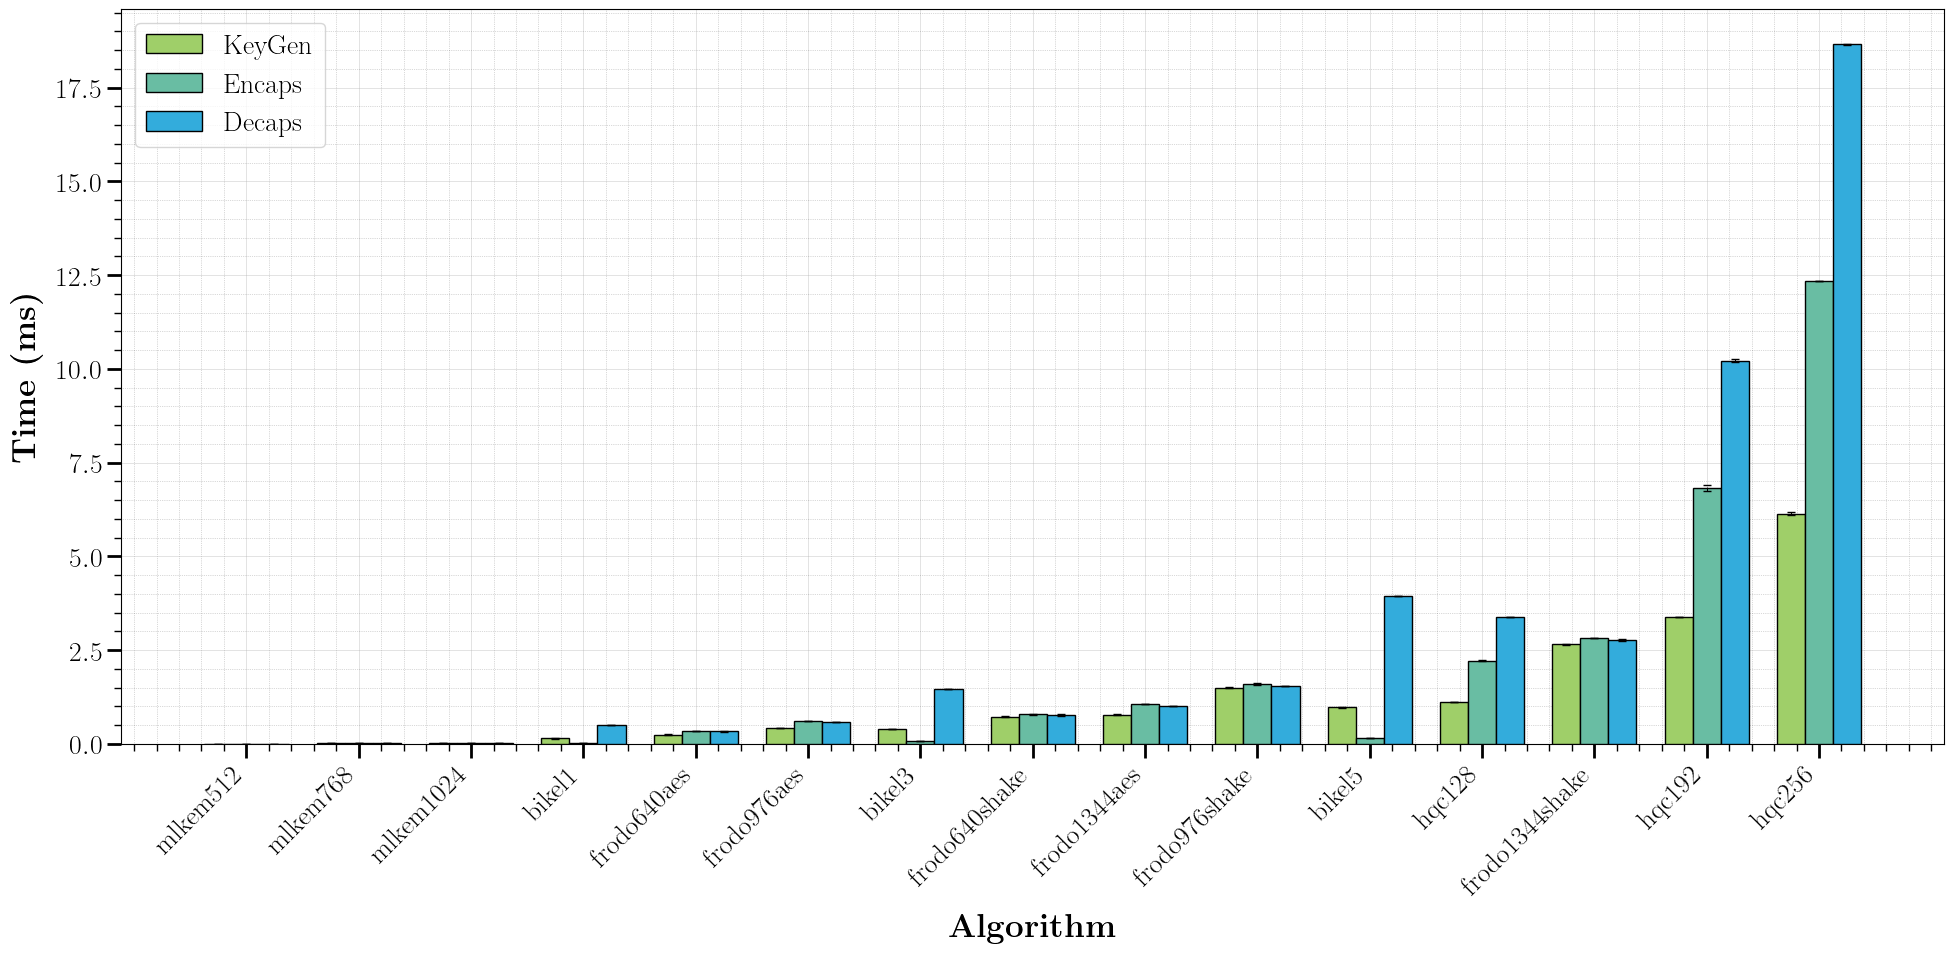

In [8]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_ops_times.pdf", y_start=None)

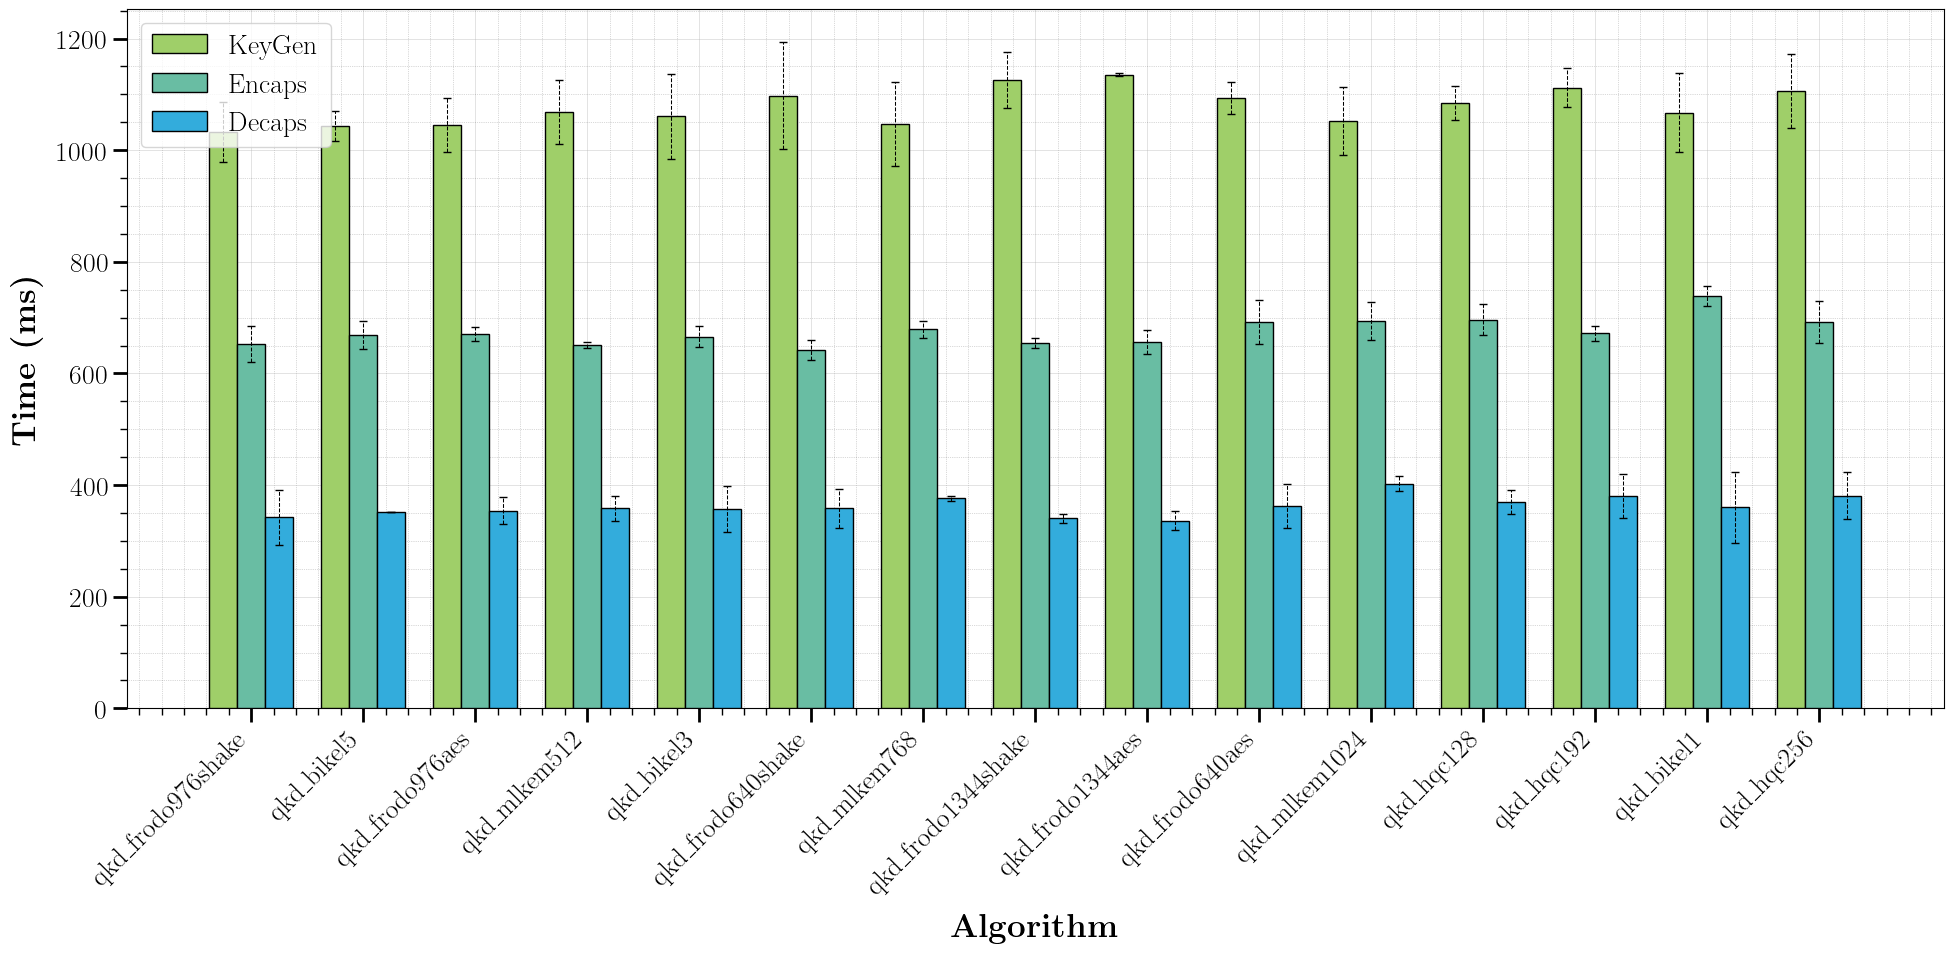

In [9]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_ops_times.pdf", y_start=None)

In [10]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times.pdf", y_start=None)

In [11]:
plot_kem_total_times(df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_total_times.pdf", y_start=None)

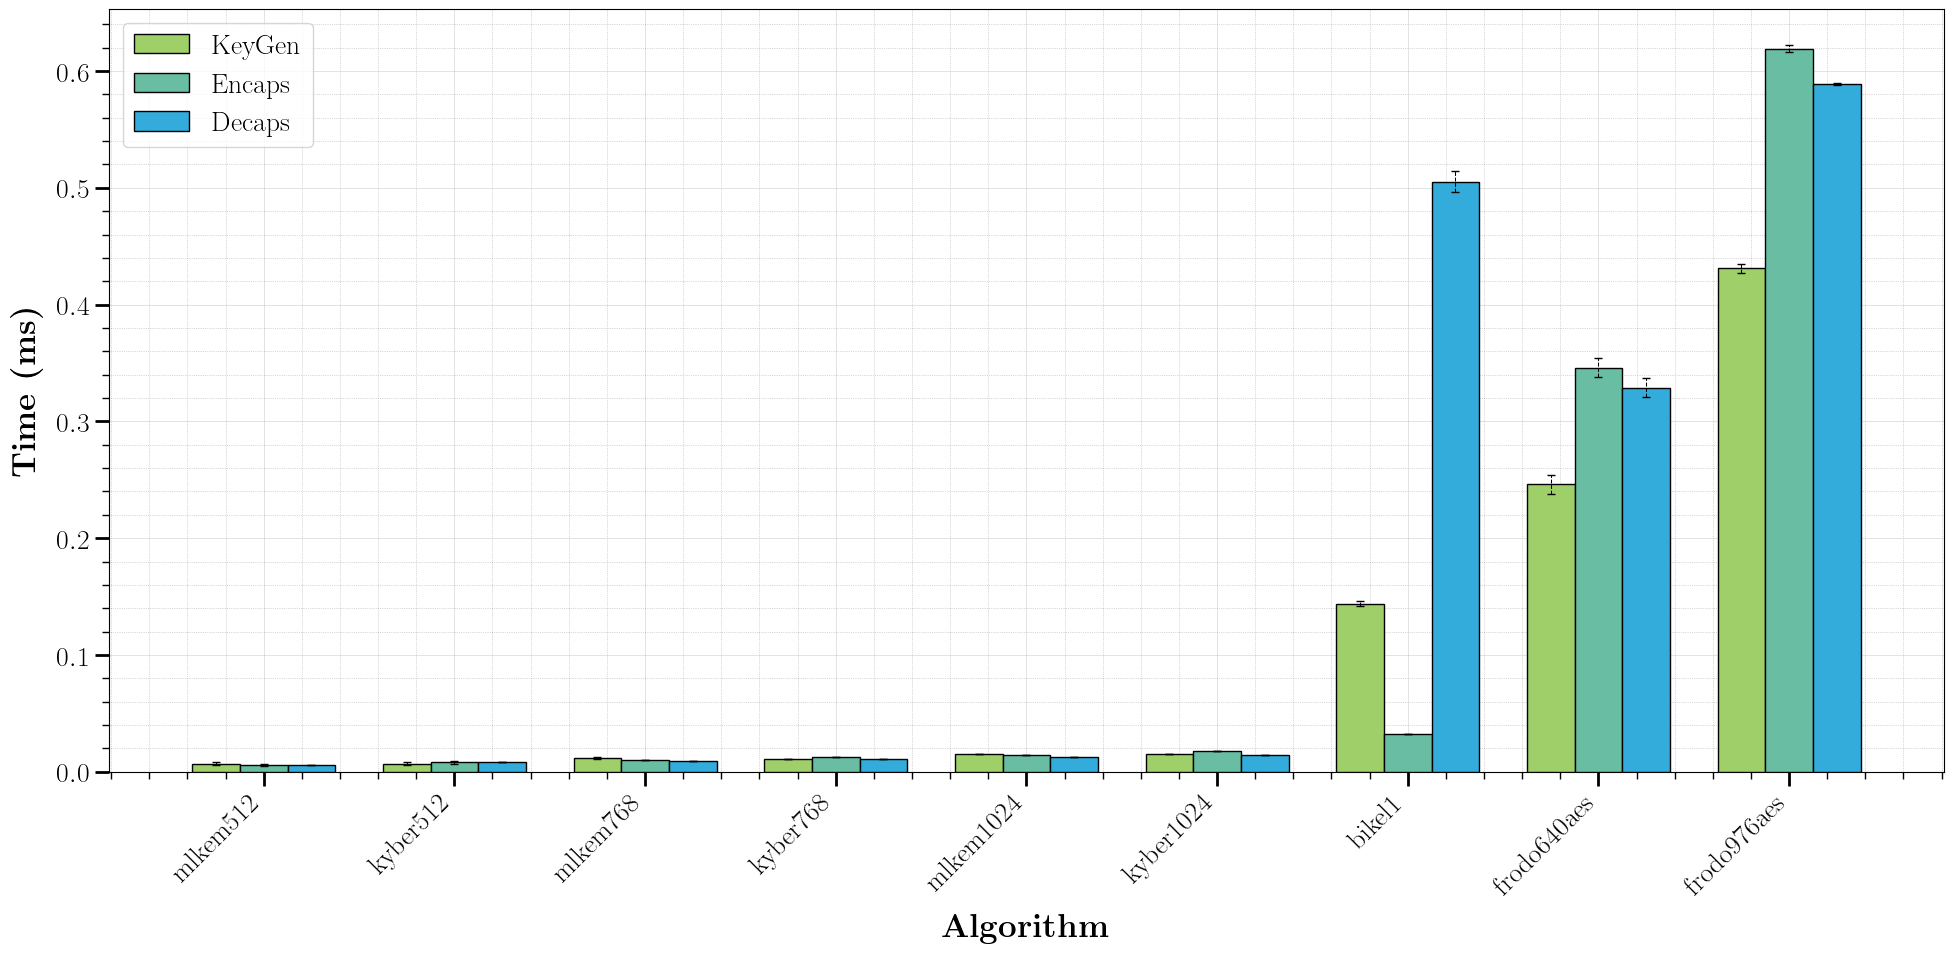

In [12]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times.pdf")

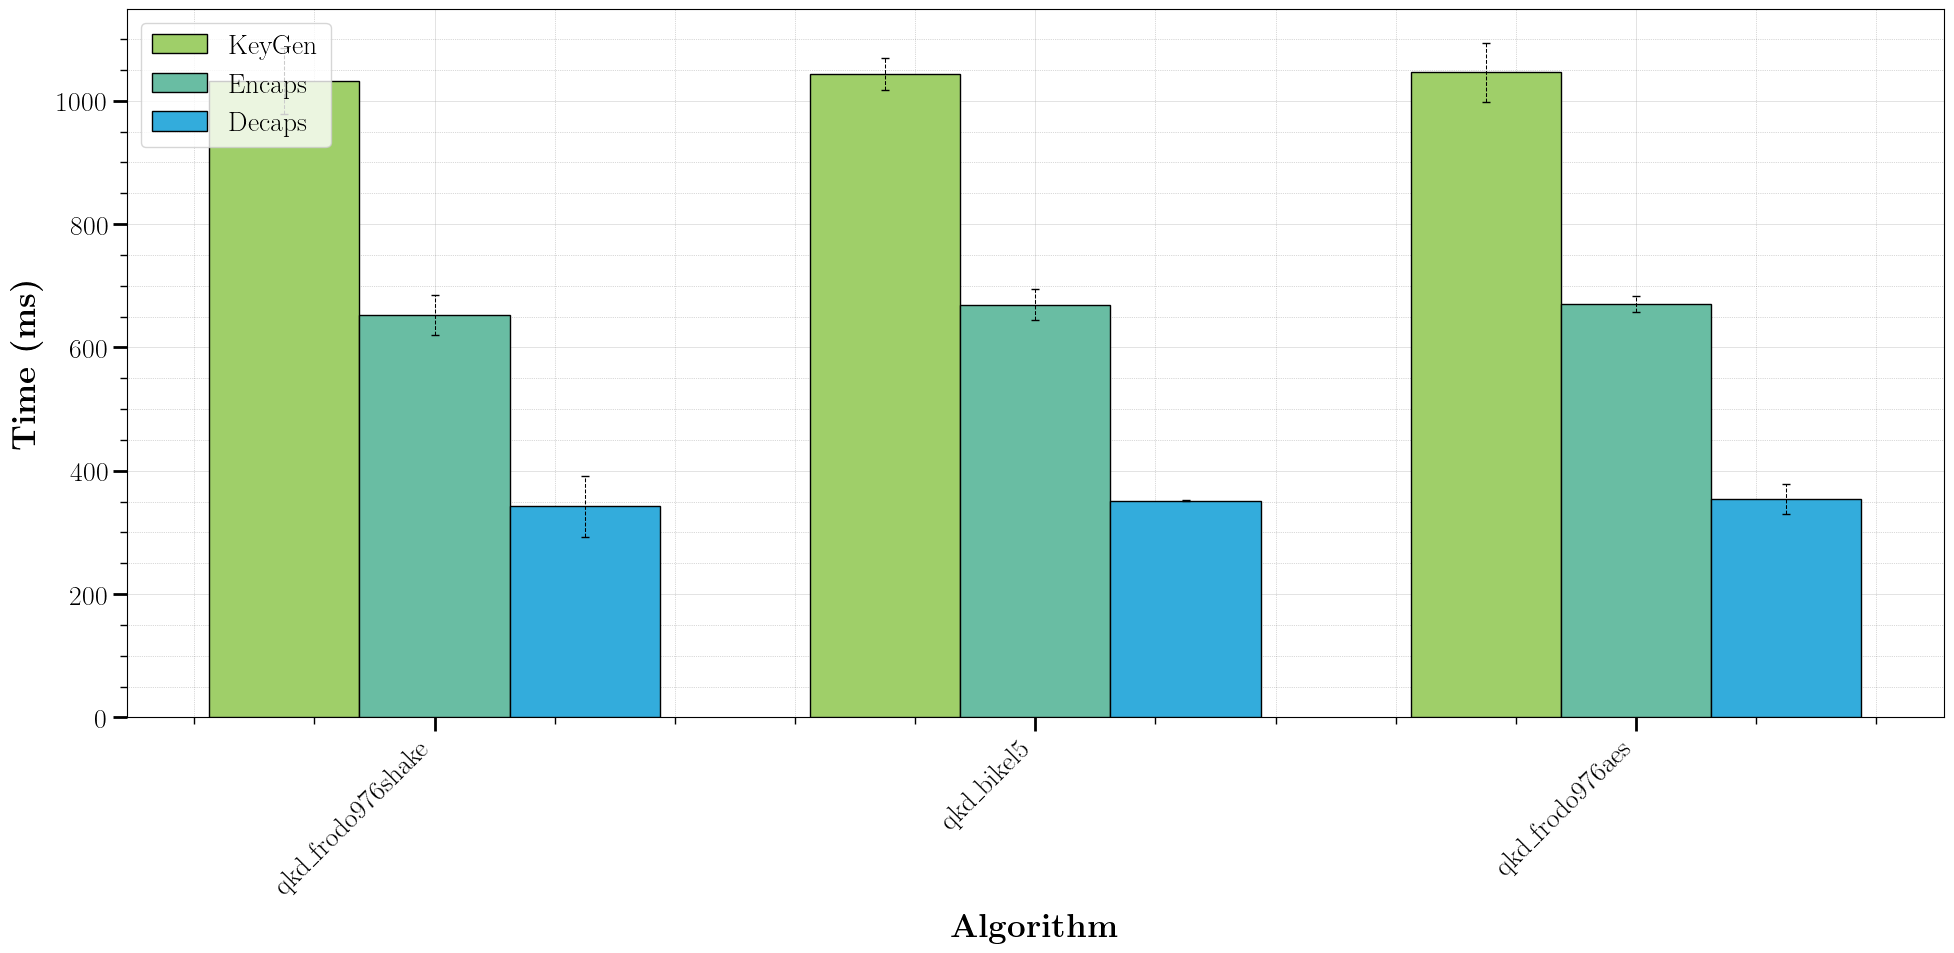

In [13]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_fast_times.pdf")

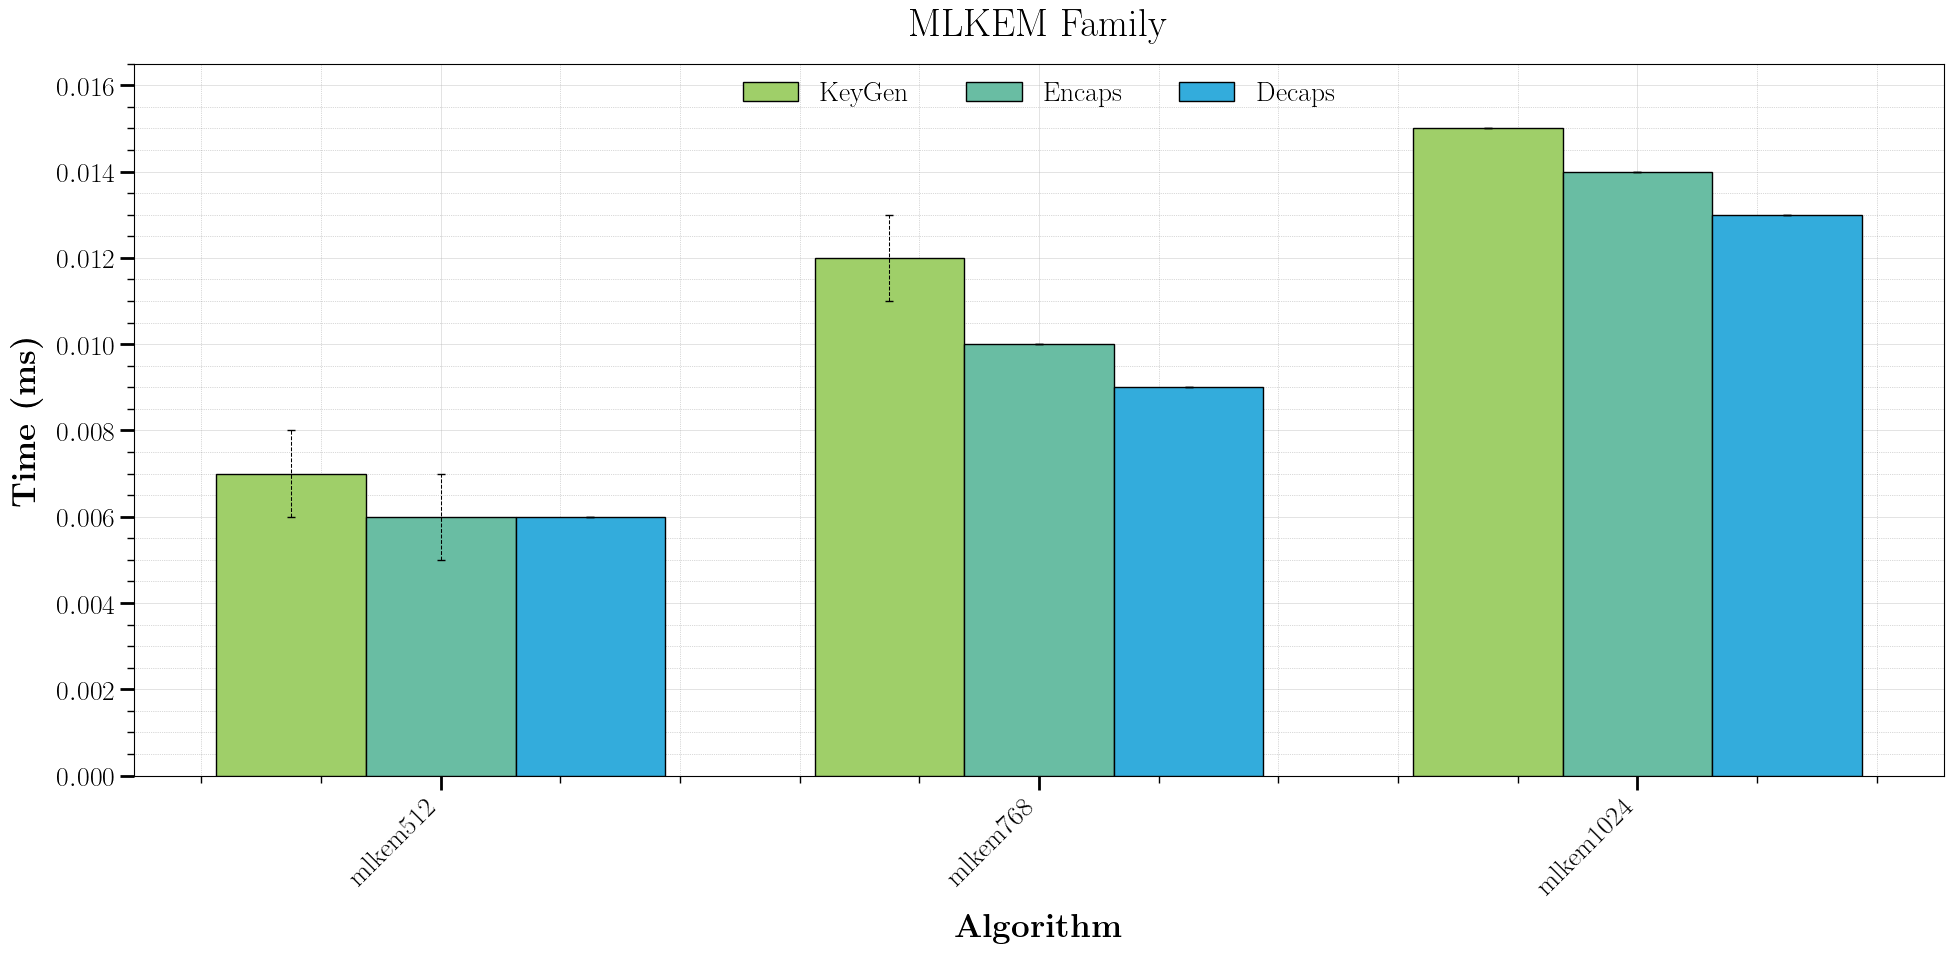

In [14]:
plot_kem_family(input_df=df_kems_stats, family='mlkem', error_suffix="_std", plot_title="mlkem_times.pdf", log_scale=False)

In [15]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times.pdf", log_scale=False)

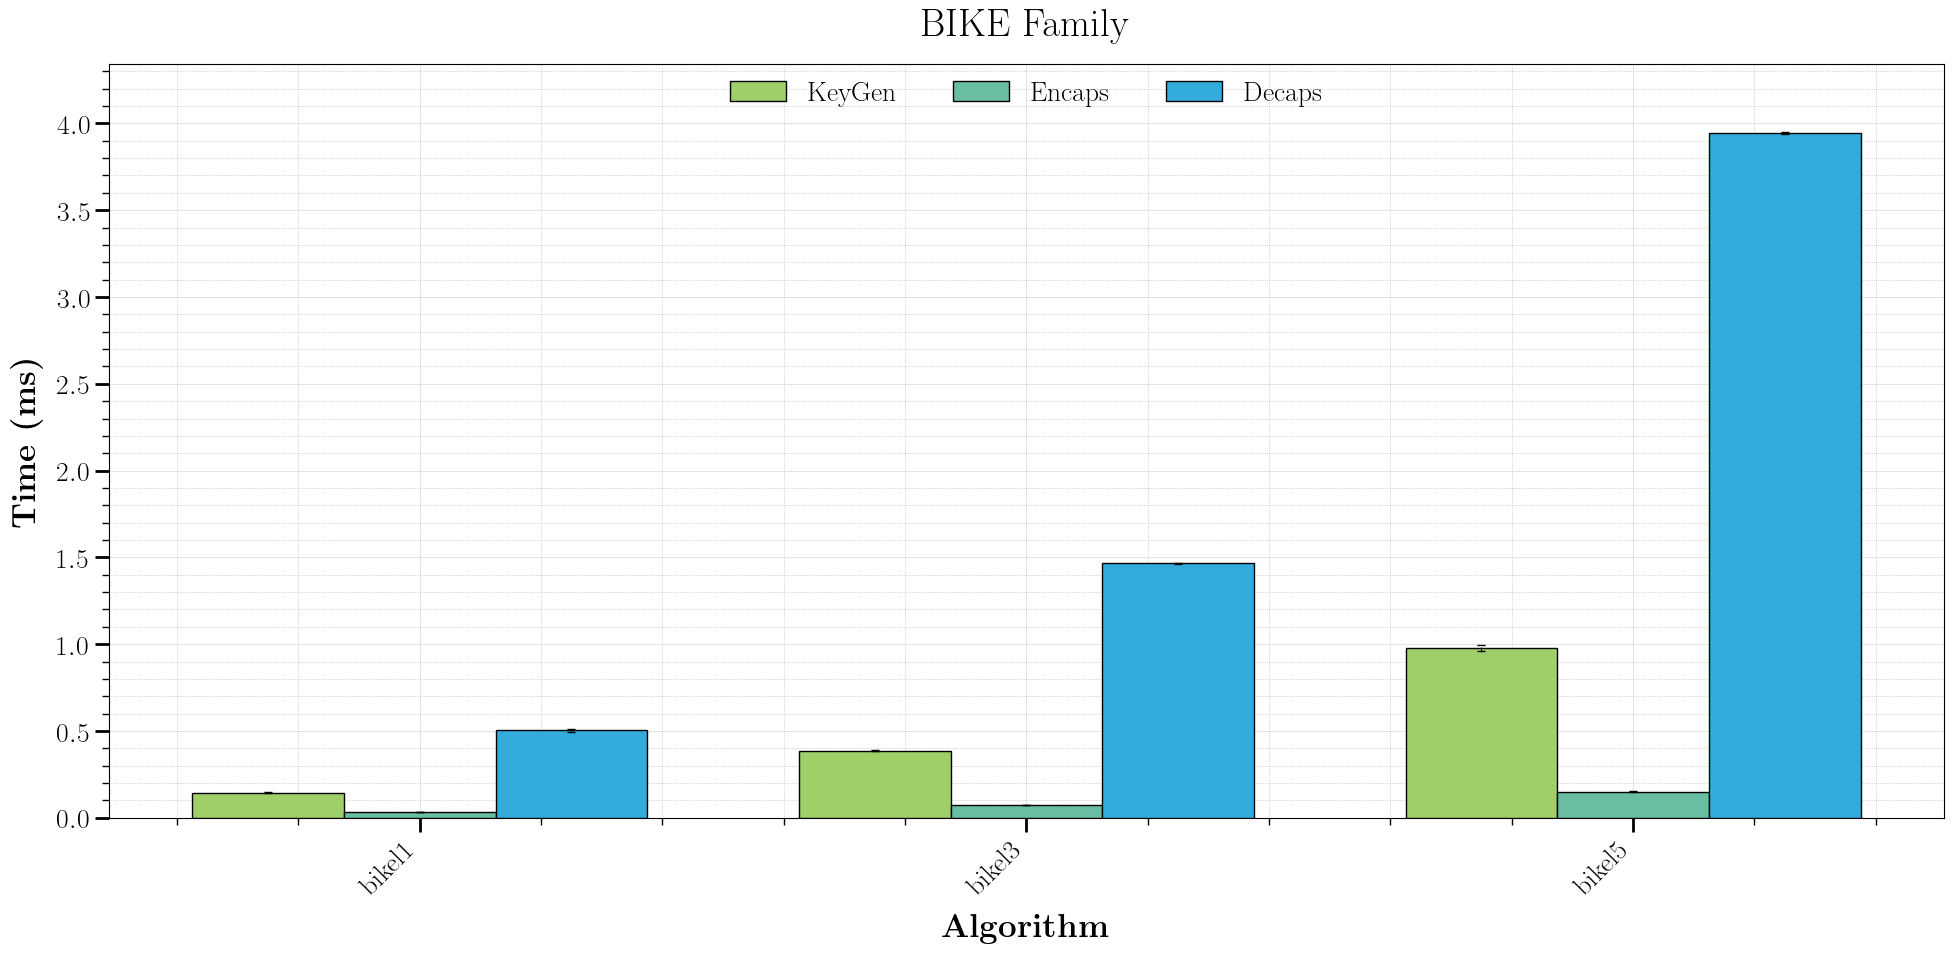

In [16]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

In [17]:
plot_kem_family(input_df=df_qkdkems_stats, family='bike', error_suffix="_std", plot_title="qkdbike_times.pdf", log_scale=False)

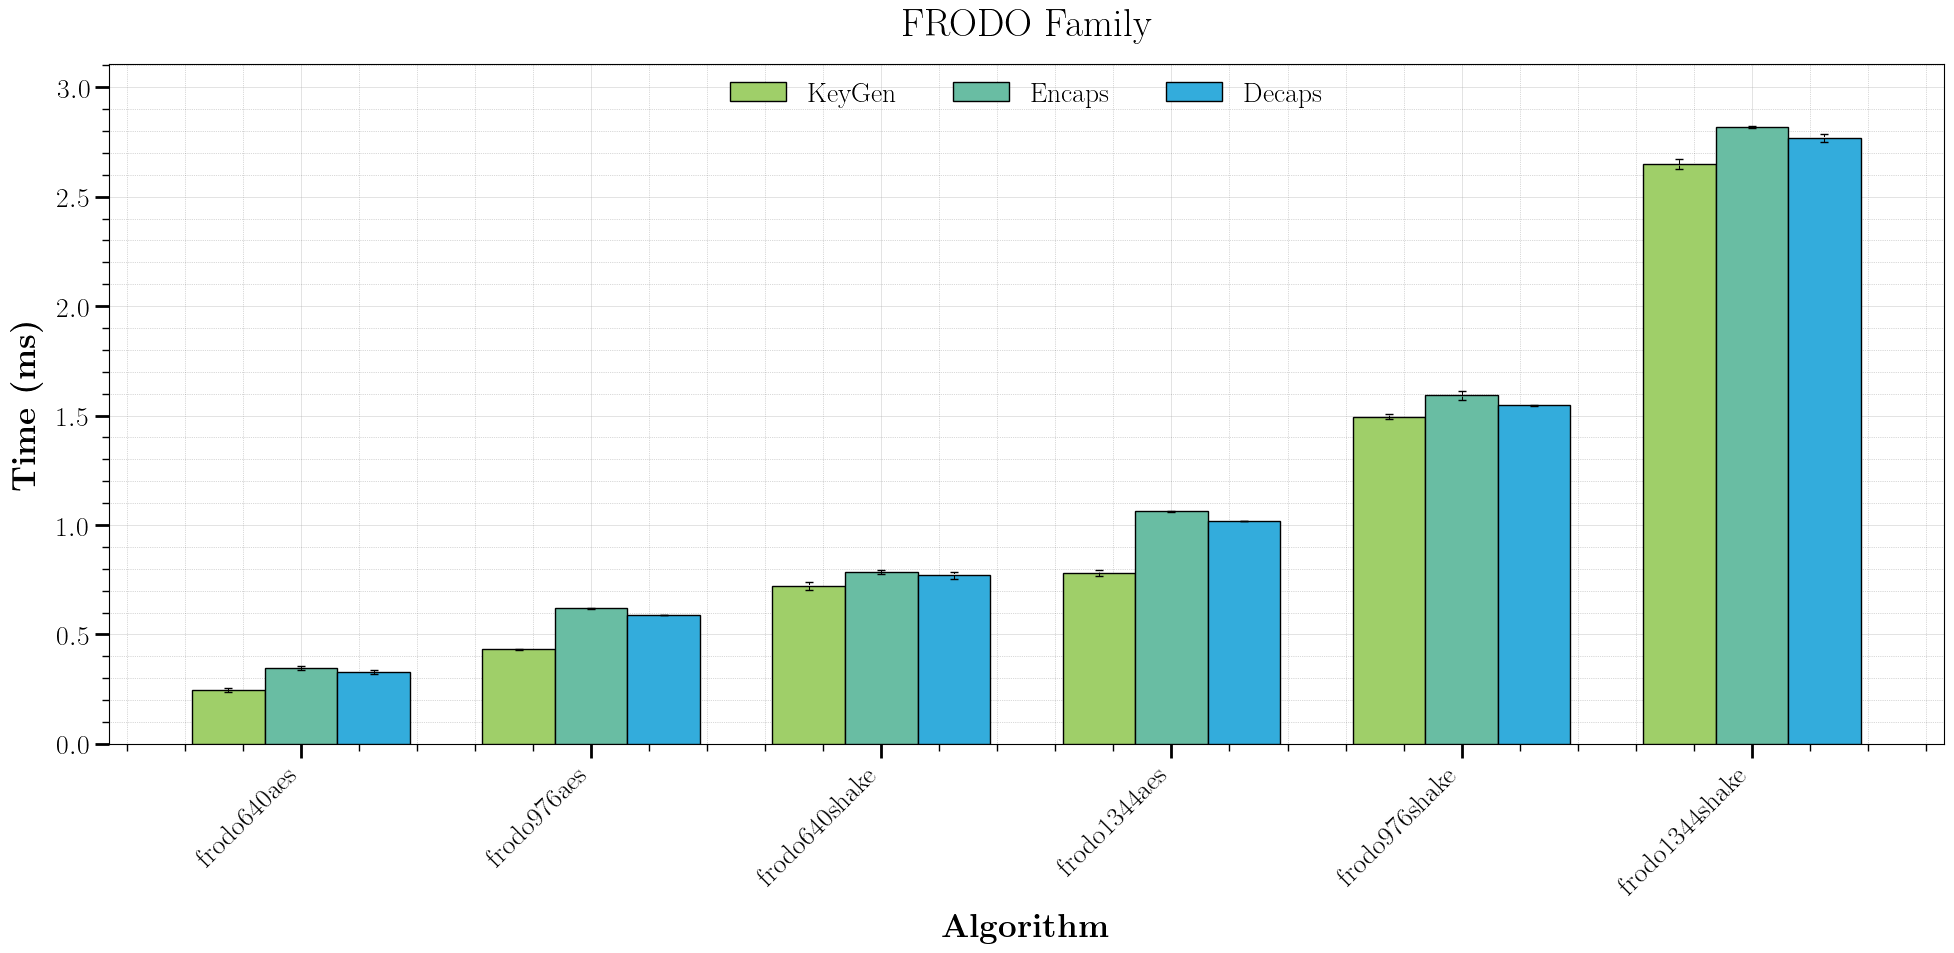

In [18]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

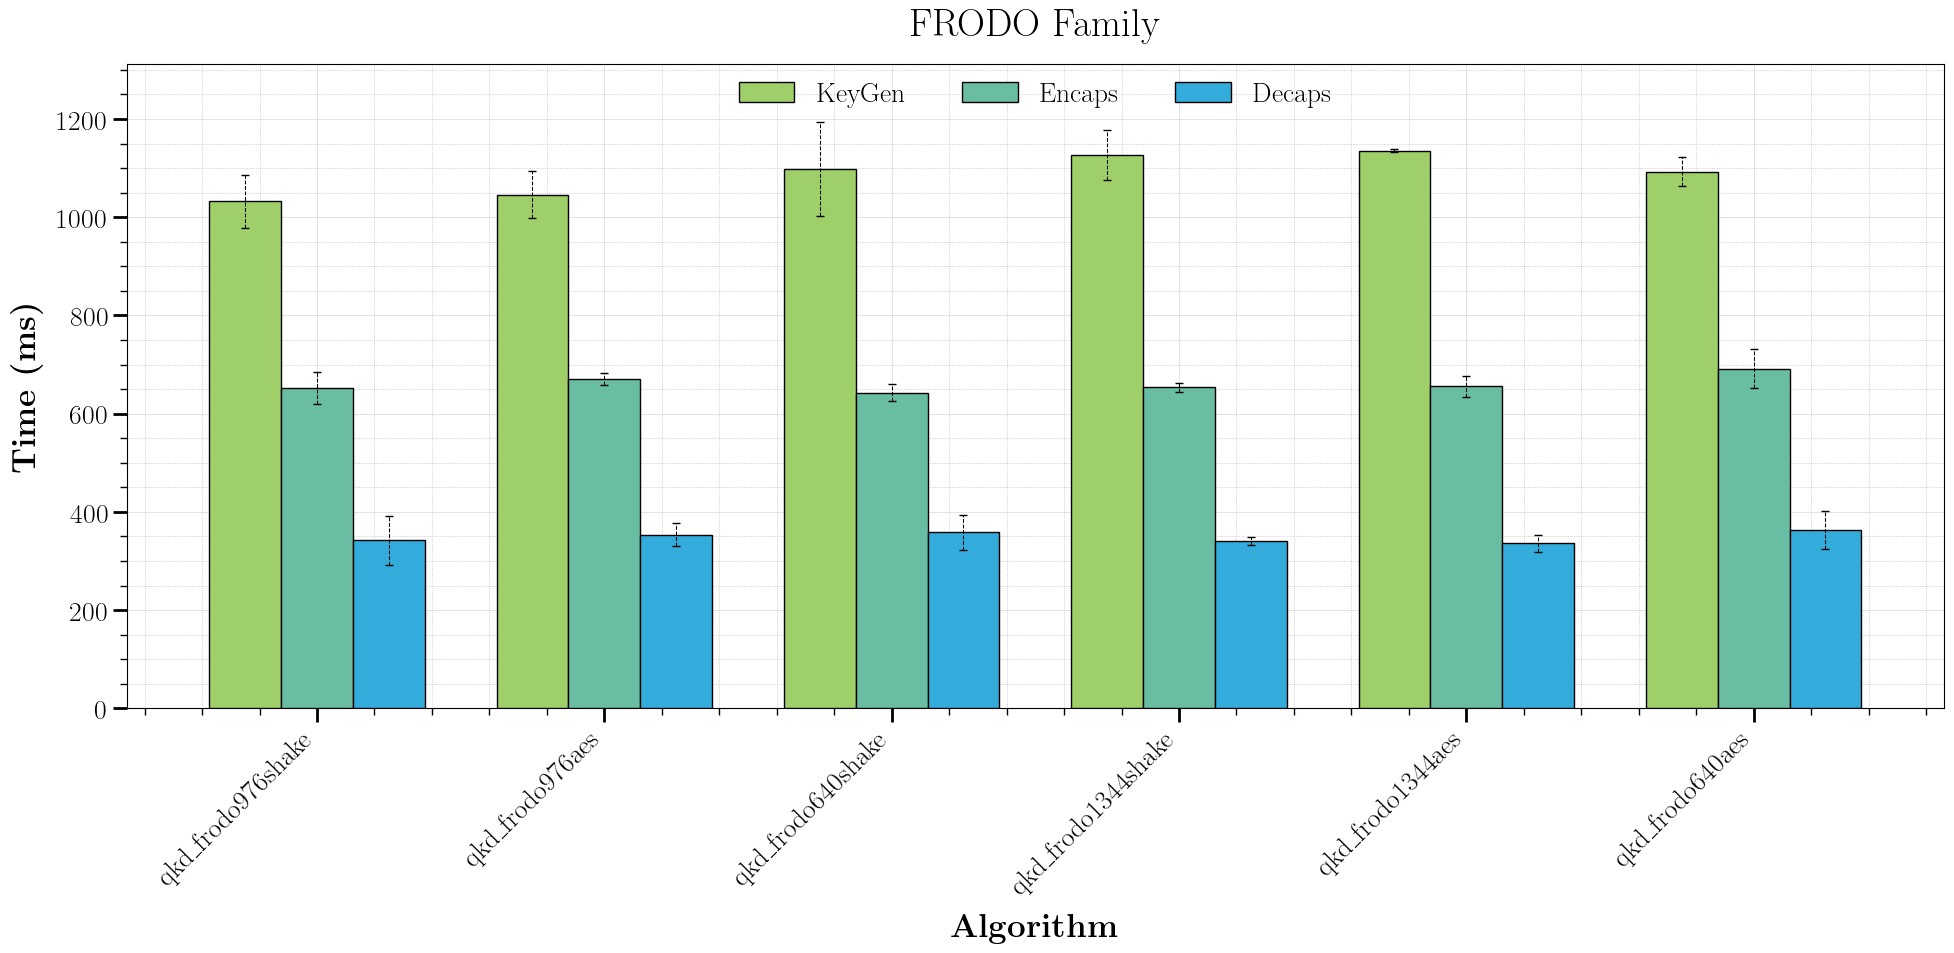

In [19]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times.pdf", log_scale=False)

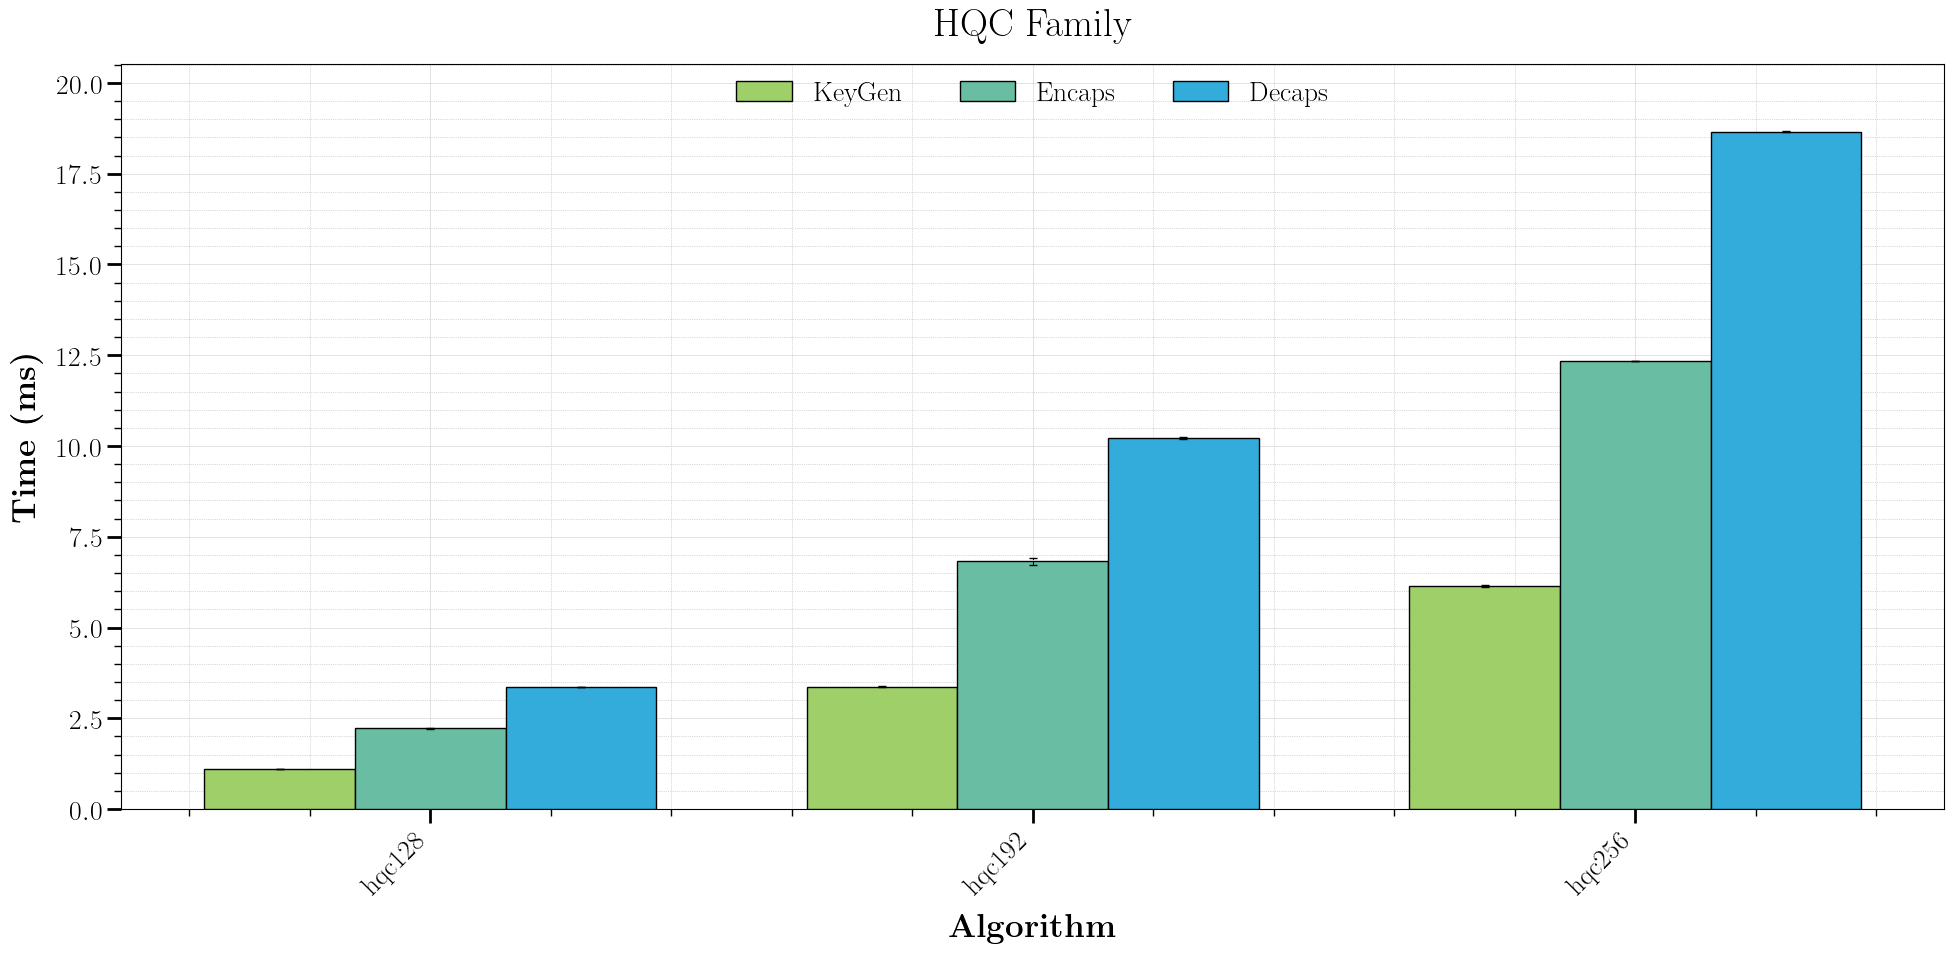

In [20]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

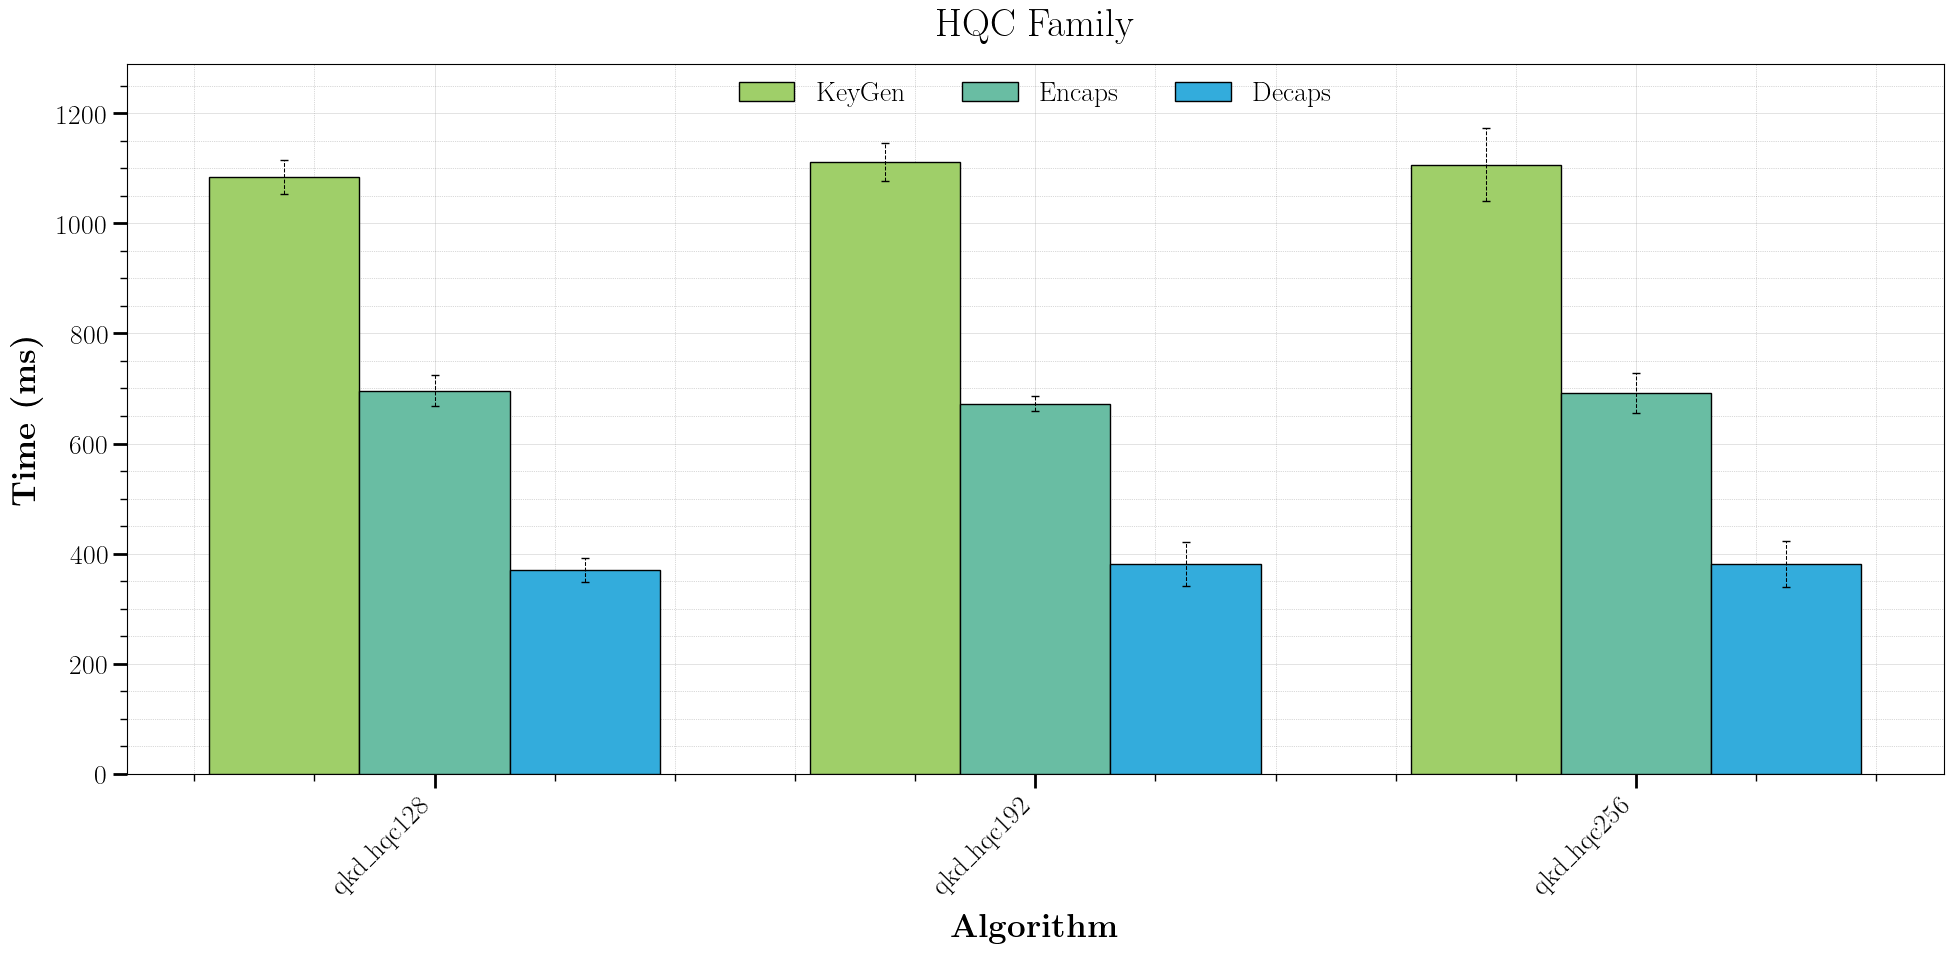

In [21]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times.pdf", log_scale=False)

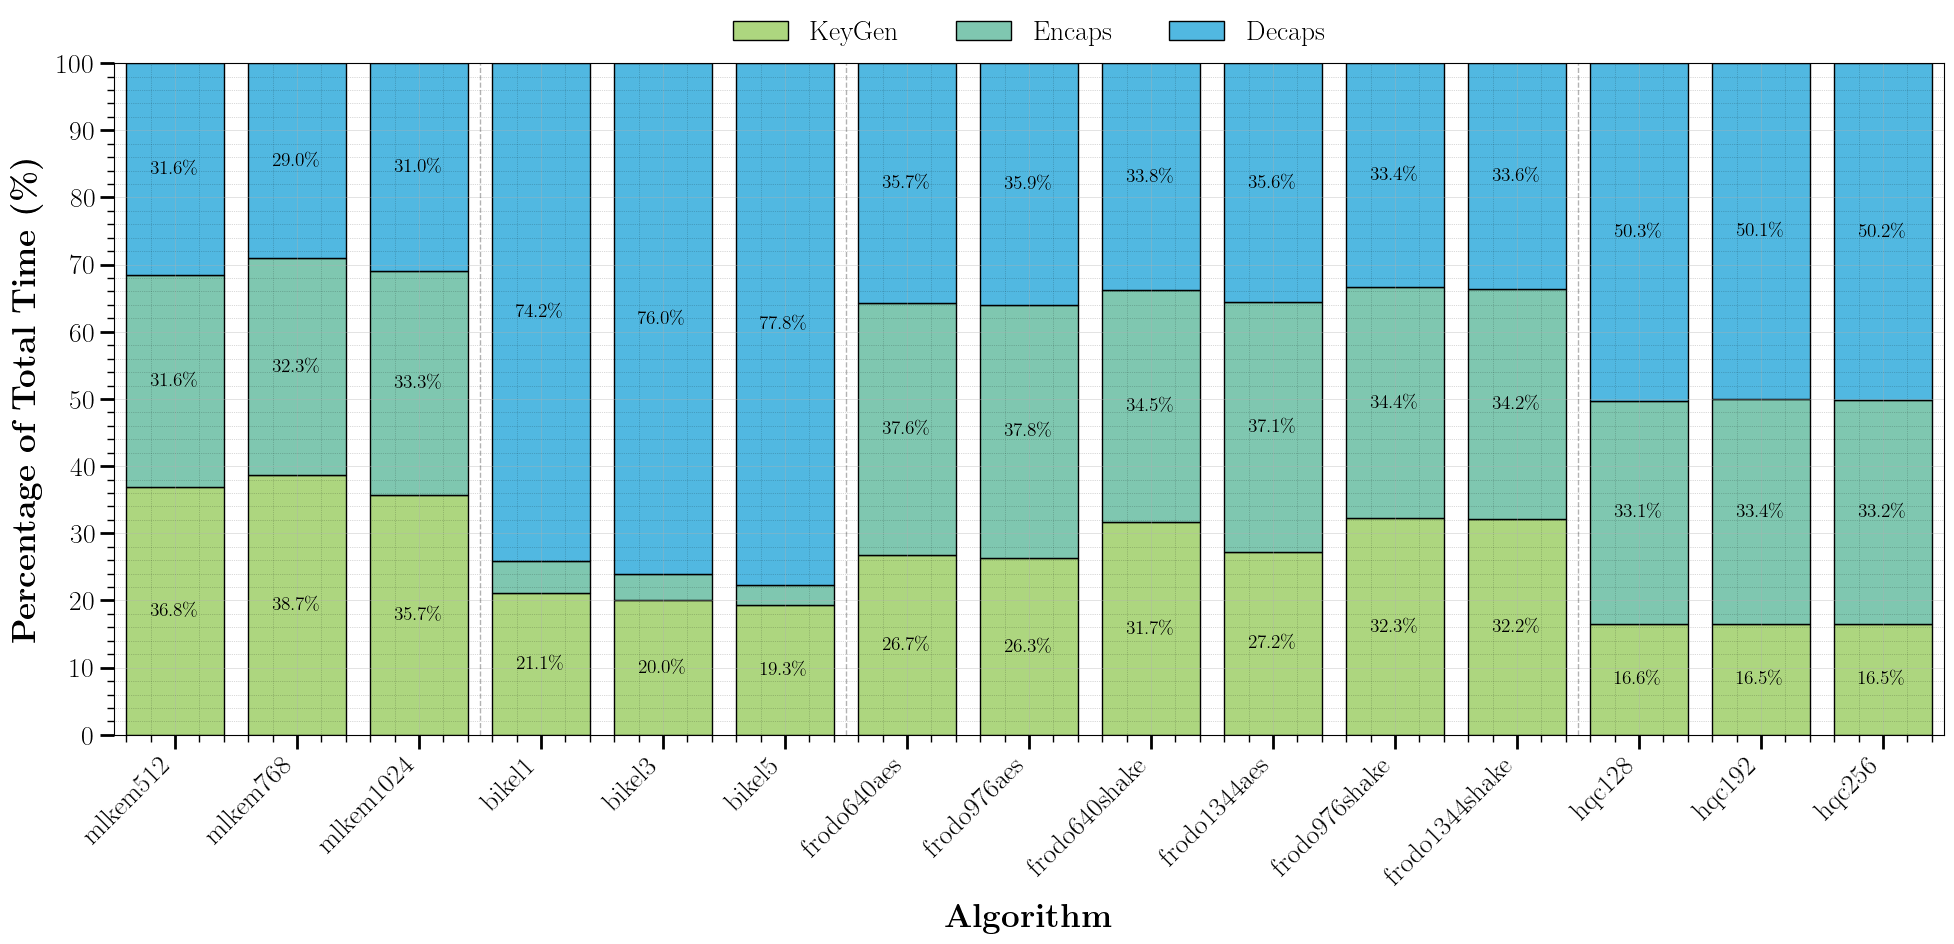

In [22]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="kems_ops_overhead.pdf")

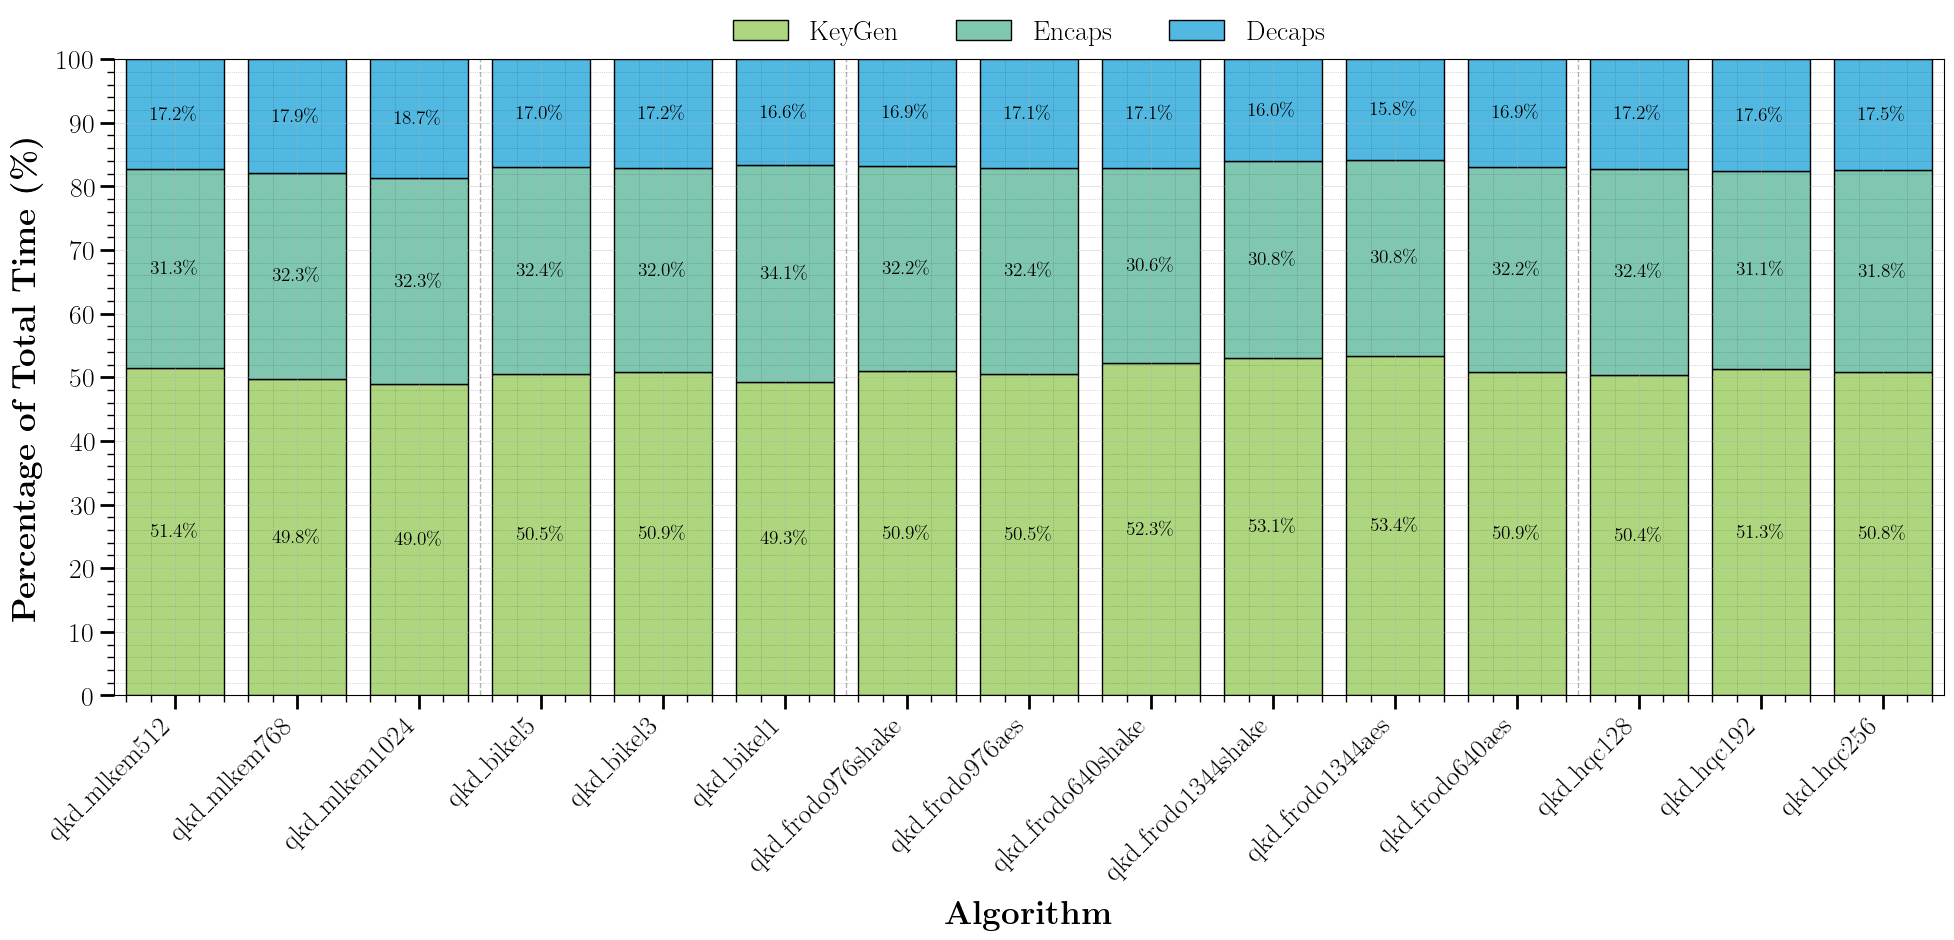

In [23]:
plot_ops_percent(input_df=df_qkdkems_stats, family=None, plot_title="qkdkems_ops_overhead.pdf")

In [24]:
# Combine the DataFrames for comparison 

from config import (KEM_FAMILIES)

algo_names = [alg for family in KEM_FAMILIES.values() for alg in family]

# Create copies to avoid modifying originals
df_std = df_kems_stats.copy()
df_qkd = df_qkdkems_stats.copy()

# Filtering 
df_std_ = df_std[df_std.index.isin(algo_names)]
df_qkd_ = df_qkd[df_qkd.index.str.replace('qkd_', '').isin(algo_names)]
    
# Rename indices to match if needed
df_qkd_.index = [idx.replace('qkd_', '') for idx in df_qkd_.index]
    
# Concatenate and sort
comparison_stats = pd.concat([df_std_, df_qkd_], 
                            keys=['OQS', 'QKD'],
                            names=['Variant', 'Algorithm'])

comparison_stats.to_csv("data/comparison_stats.csv")

comparison_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Variant Algorithm                                                        
OQS     bikel1                      3            0.144           0.002   
        bikel3                      3            0.386           0.002   
        bikel5                      3            0.977           0.016   
        frodo1344aes                3            0.779           0.014   
        frodo1344shake              3            2.650           0.022   
        frodo640aes                 3            0.246           0.008   
        frodo640shake               3            0.721           0.017   
        frodo976aes                 3            0.431           0.004   
        frodo976shake               3            1.495           0.011   
        hqc128                      3            1.110           0.004   
        hqc192                      3            3.375           0.002   
        hqc256                      3            6.140           0.035   
        mlkem1024                   3            0.015           0.000   
        mlkem512                    3            0.007           0.001   
        mlkem768                    3            0.012           0.001   
QKD     bikel1                      3         1066.767          70.695   
        bikel3                      3         1060.449          75.825   
        bikel5                      3         1043.554          26.422   
        frodo1344aes                3         1135.535           3.276   
        frodo1344shake              3         1126.056          50.683   
        frodo640aes                 3         1093.100          28.993   
        frodo640shake               3         1097.522          95.778   
        frodo976aes                 3         1045.809          48.221   
        frodo976shake               3         1032.476          53.380   
        hqc128                      3         1084.674          30.411   
        hqc192                      3         1111.629          35.103   
        hqc256                      3         1106.609          66.368   
        mlkem1024                   3         1051.798          60.953   
        mlkem512                    3         1068.675          57.316   
        mlkem768                    3         1046.723          75.280   

                        KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Variant Algorithm                                                         
OQS     bikel1                   0.143           0.146            0.032   
        bikel3                   0.384           0.387            0.076   
        bikel5                   0.959           0.987            0.151   
        frodo1344aes             0.766           0.793            1.062   
        frodo1344shake           2.634           2.675            2.819   
        frodo640aes              0.241           0.255            0.346   
        frodo640shake            0.706           0.740            0.786   
        frodo976aes              0.428           0.435            0.619   
        frodo976shake            1.483           1.503            1.592   
        hqc128                   1.107           1.114            2.222   
        hqc192                   3.373           3.377            6.821   
        hqc256                   6.100           6.163           12.346   
        mlkem1024                0.015           0.015            0.014   
        mlkem512                 0.007           0.008            0.006   
        mlkem768                 0.011           0.013            0.010   
QKD     bikel1                1005.602        1144.168          738.114   
        bikel3                 973.370        1111.882          666.062   
        bikel5                1026.646        1074.002          669.413   
        frodo1344aes          1132.483        1138.996          656.240   
        frodo1344shake        1092.404        1184.348          654.148   
     

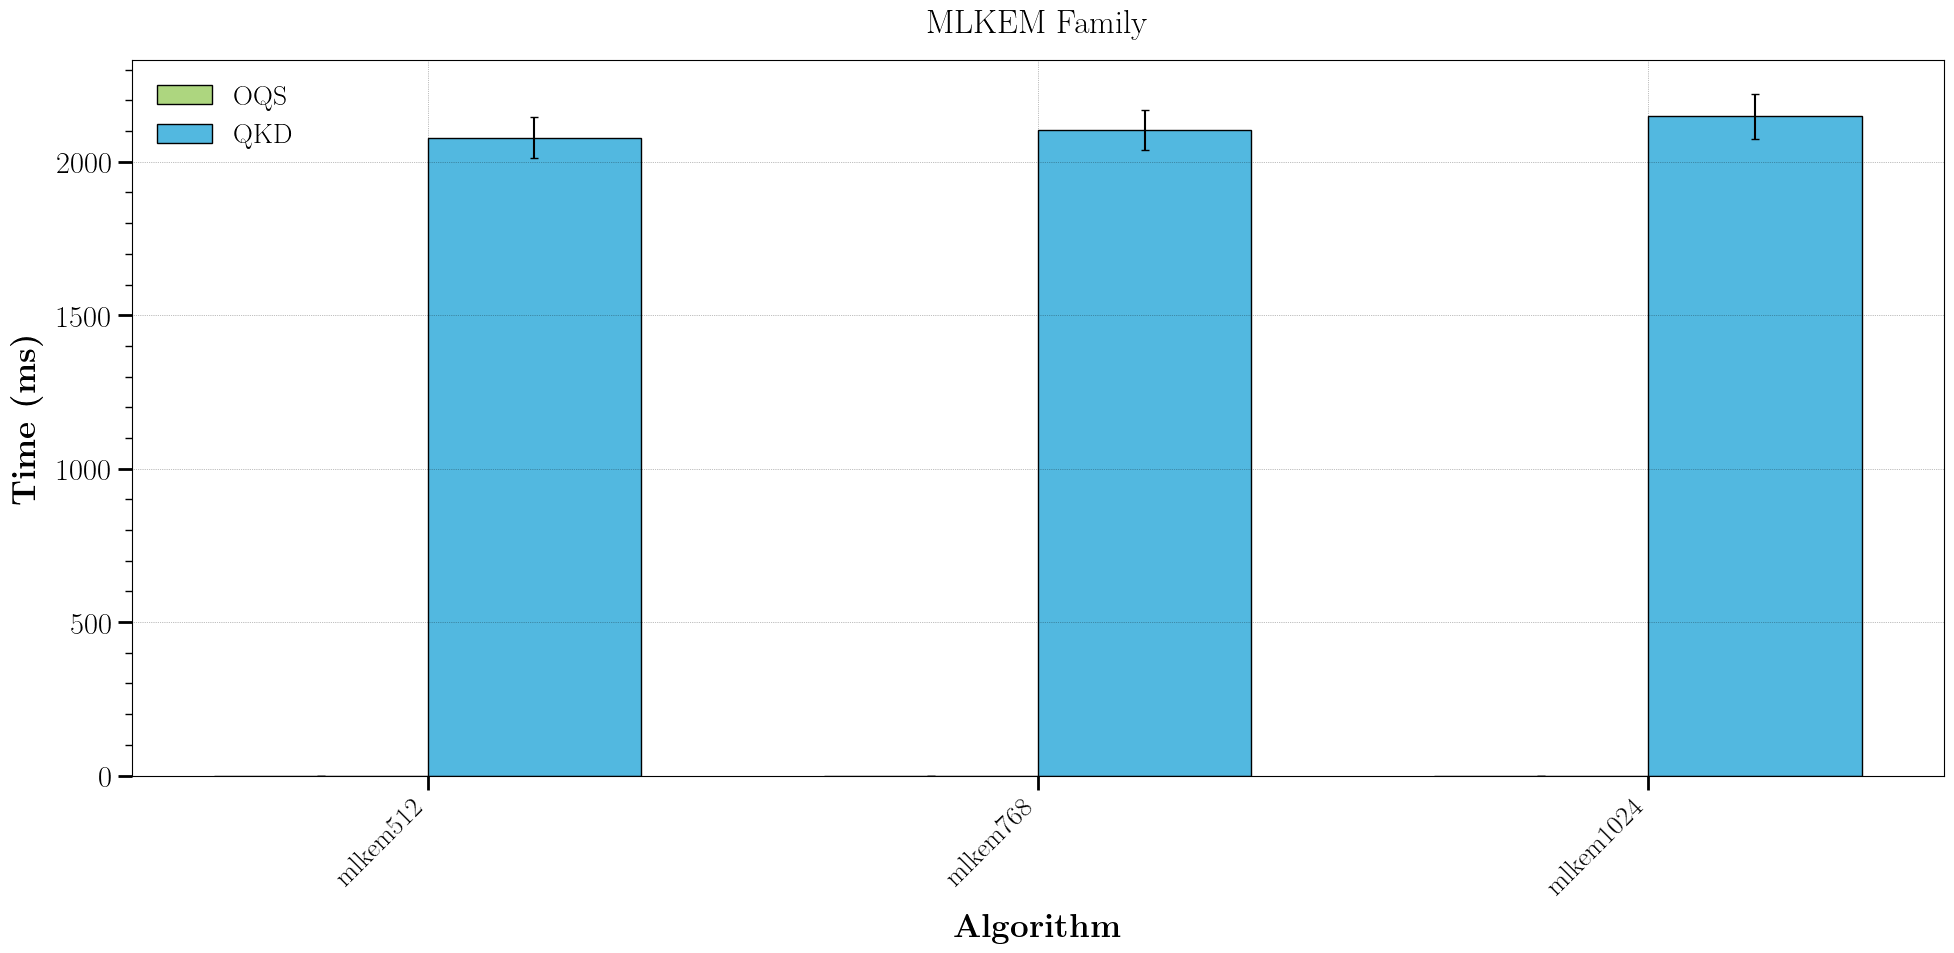

In [25]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', plot_title="mlkem_comparison.pdf")

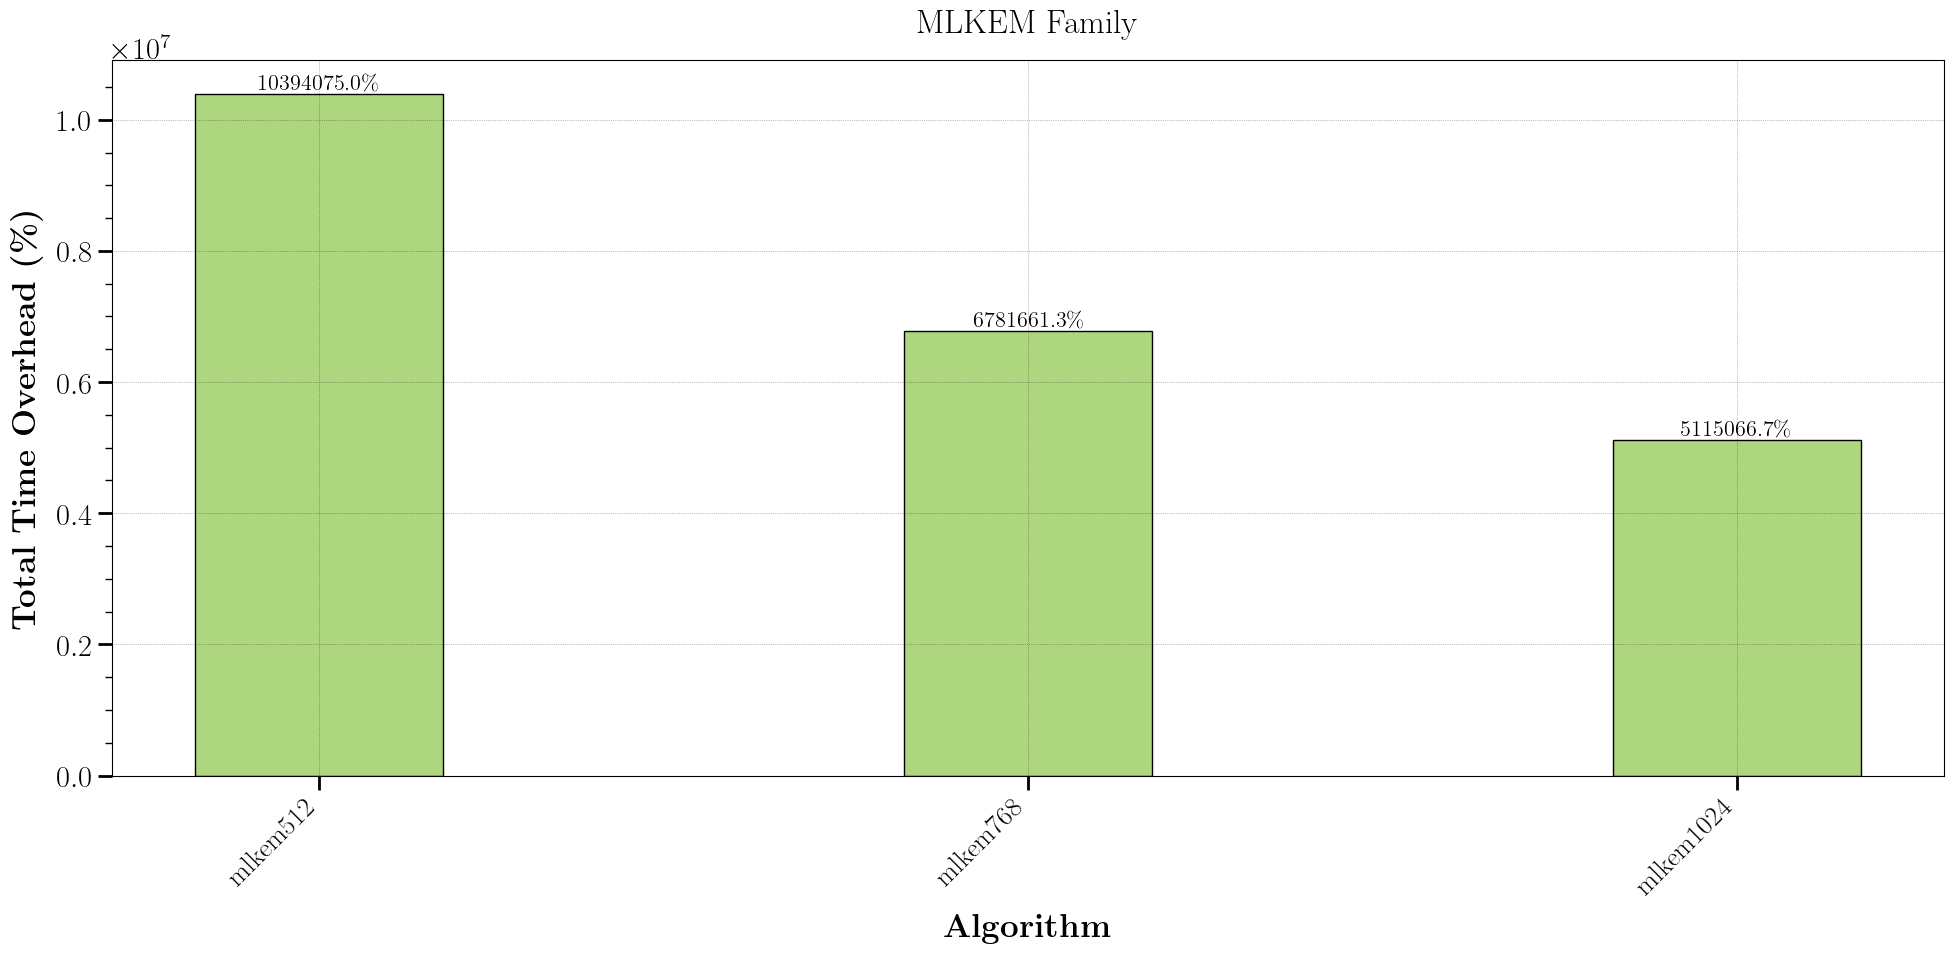

In [26]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', overhead=True, plot_title="mlkem_comparison_overhead.pdf")

In [27]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', plot_title="mlkem_comparison_keygen.pdf")

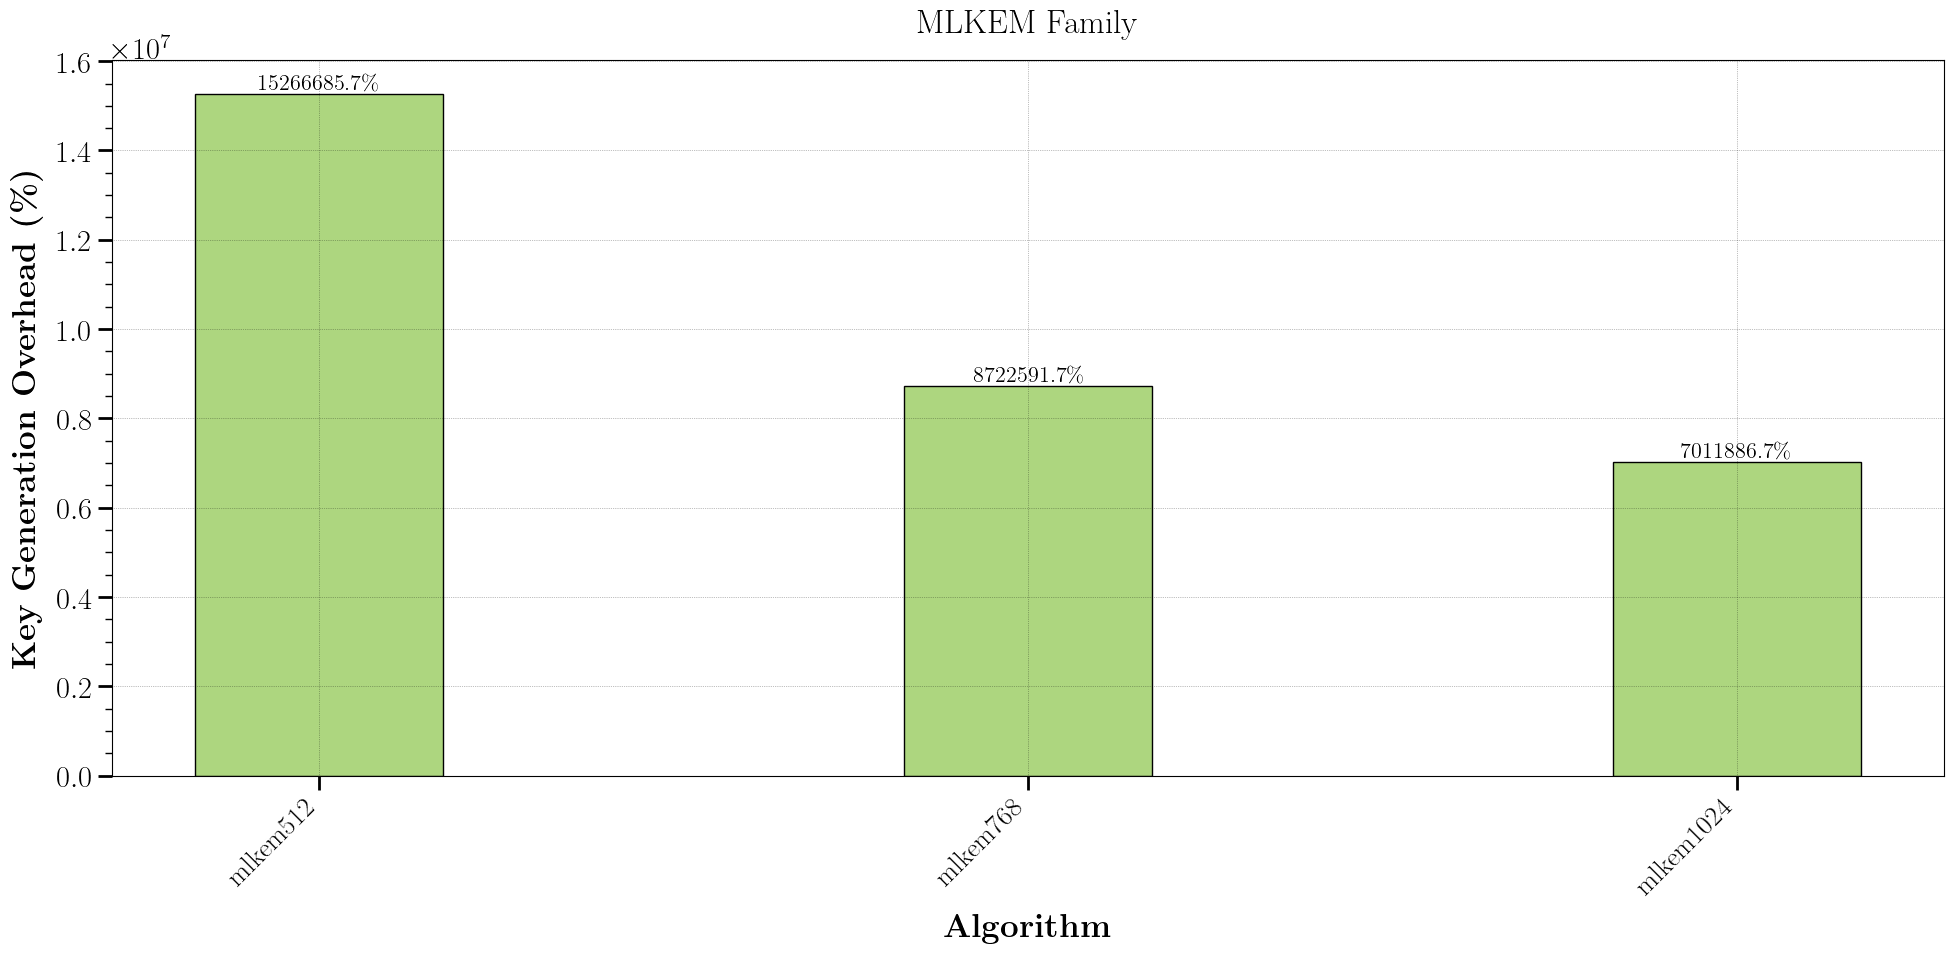

In [28]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', overhead=True, plot_title="mlkem_comparison_keygen_overhead.pdf")

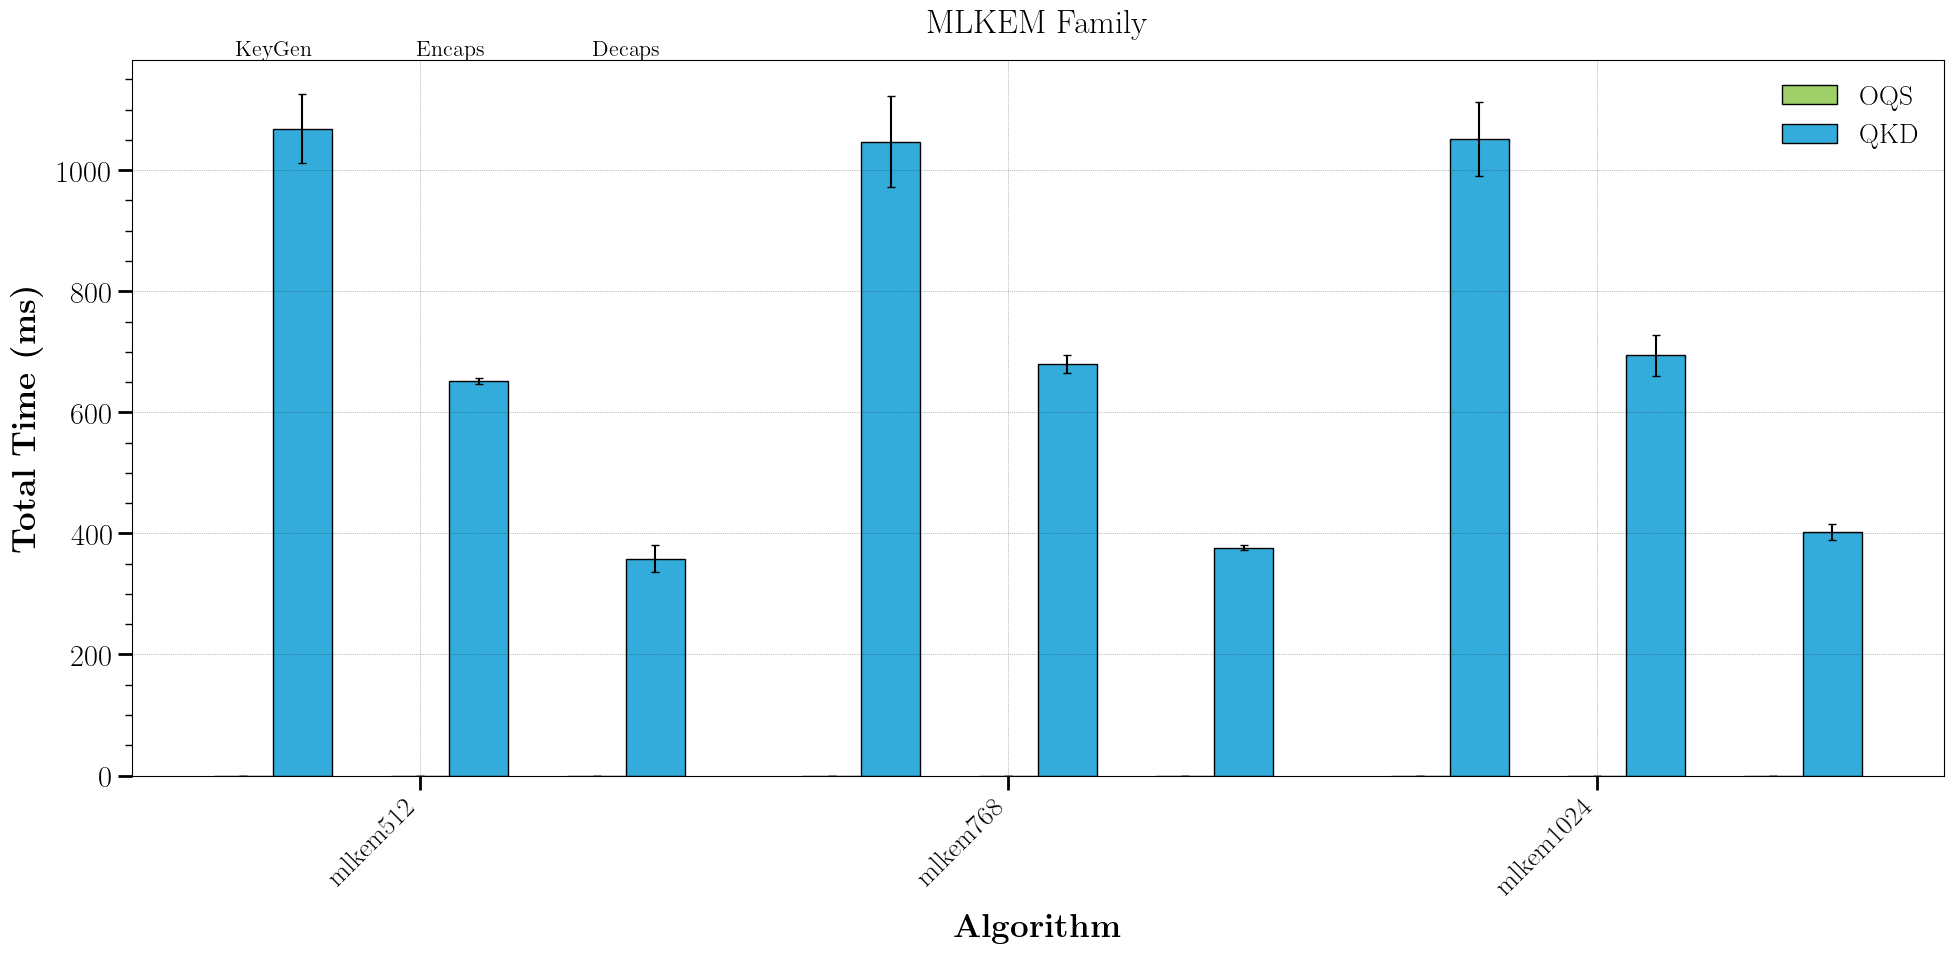

In [29]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='all', plot_title="mlkem_comparison_ops.pdf")

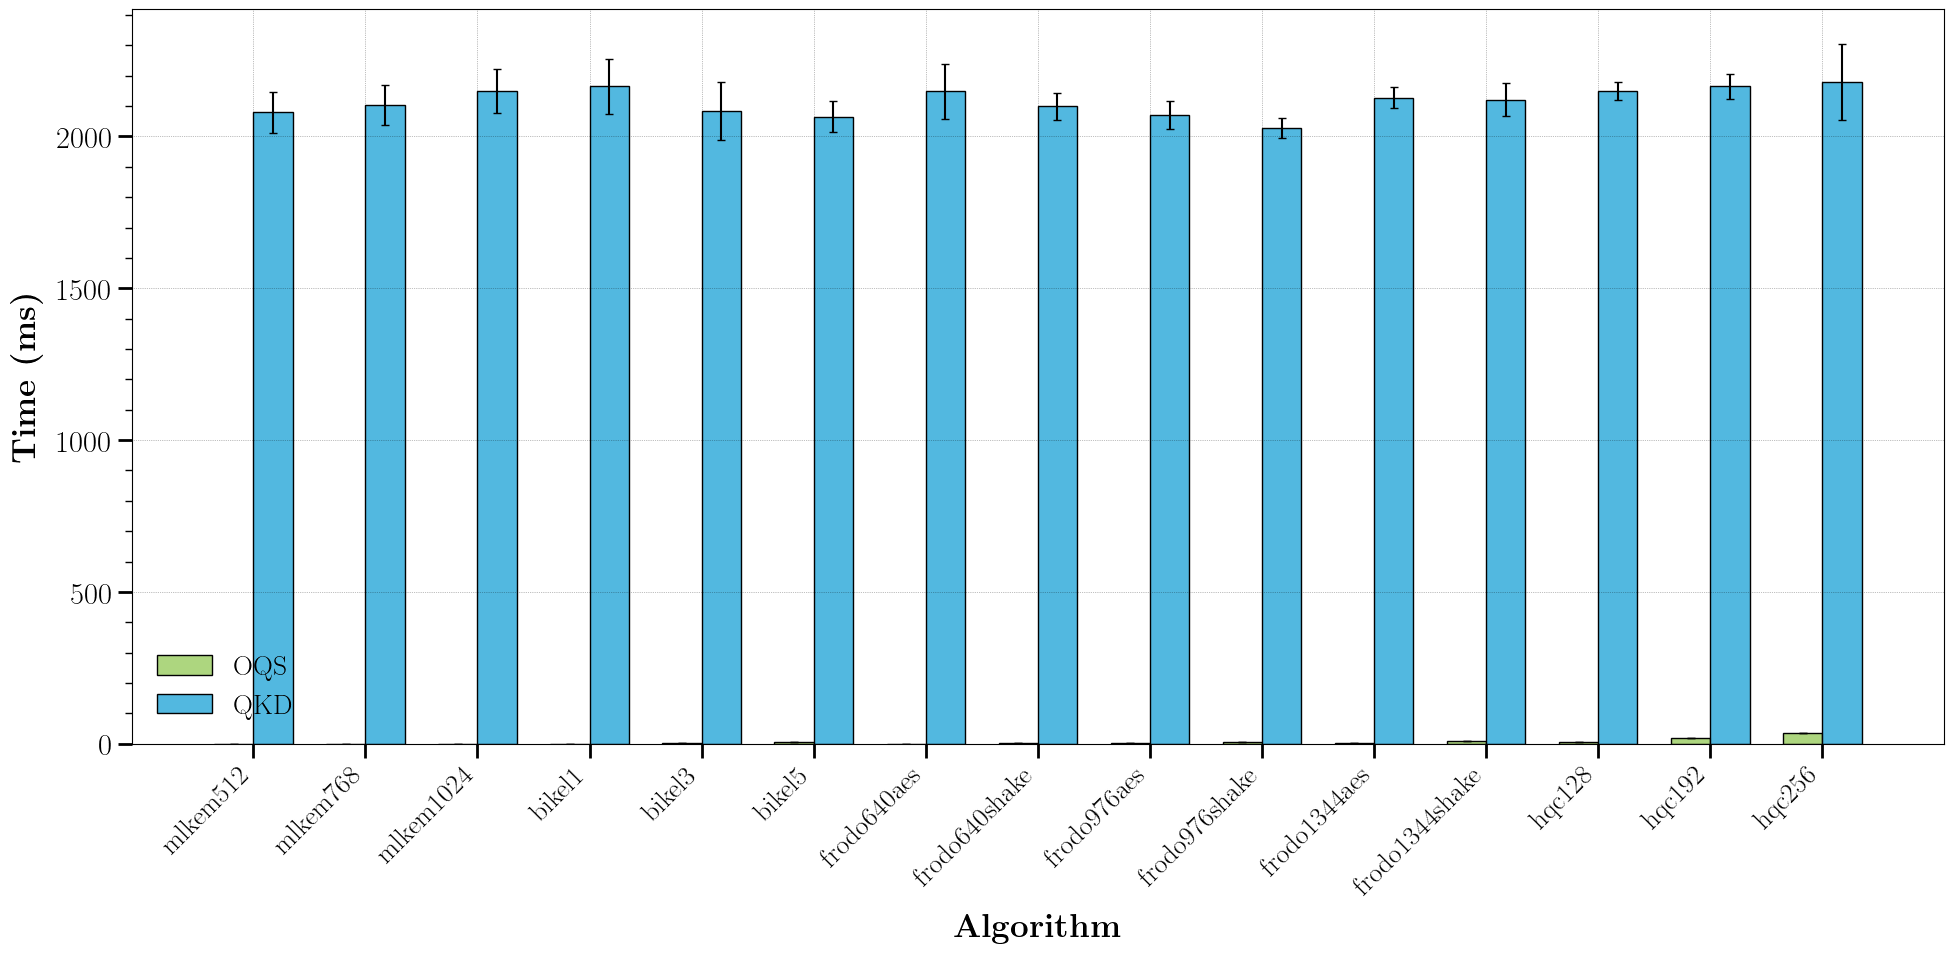

In [30]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='TotalTime(ms)',plot_title="kems_comparison.pdf")

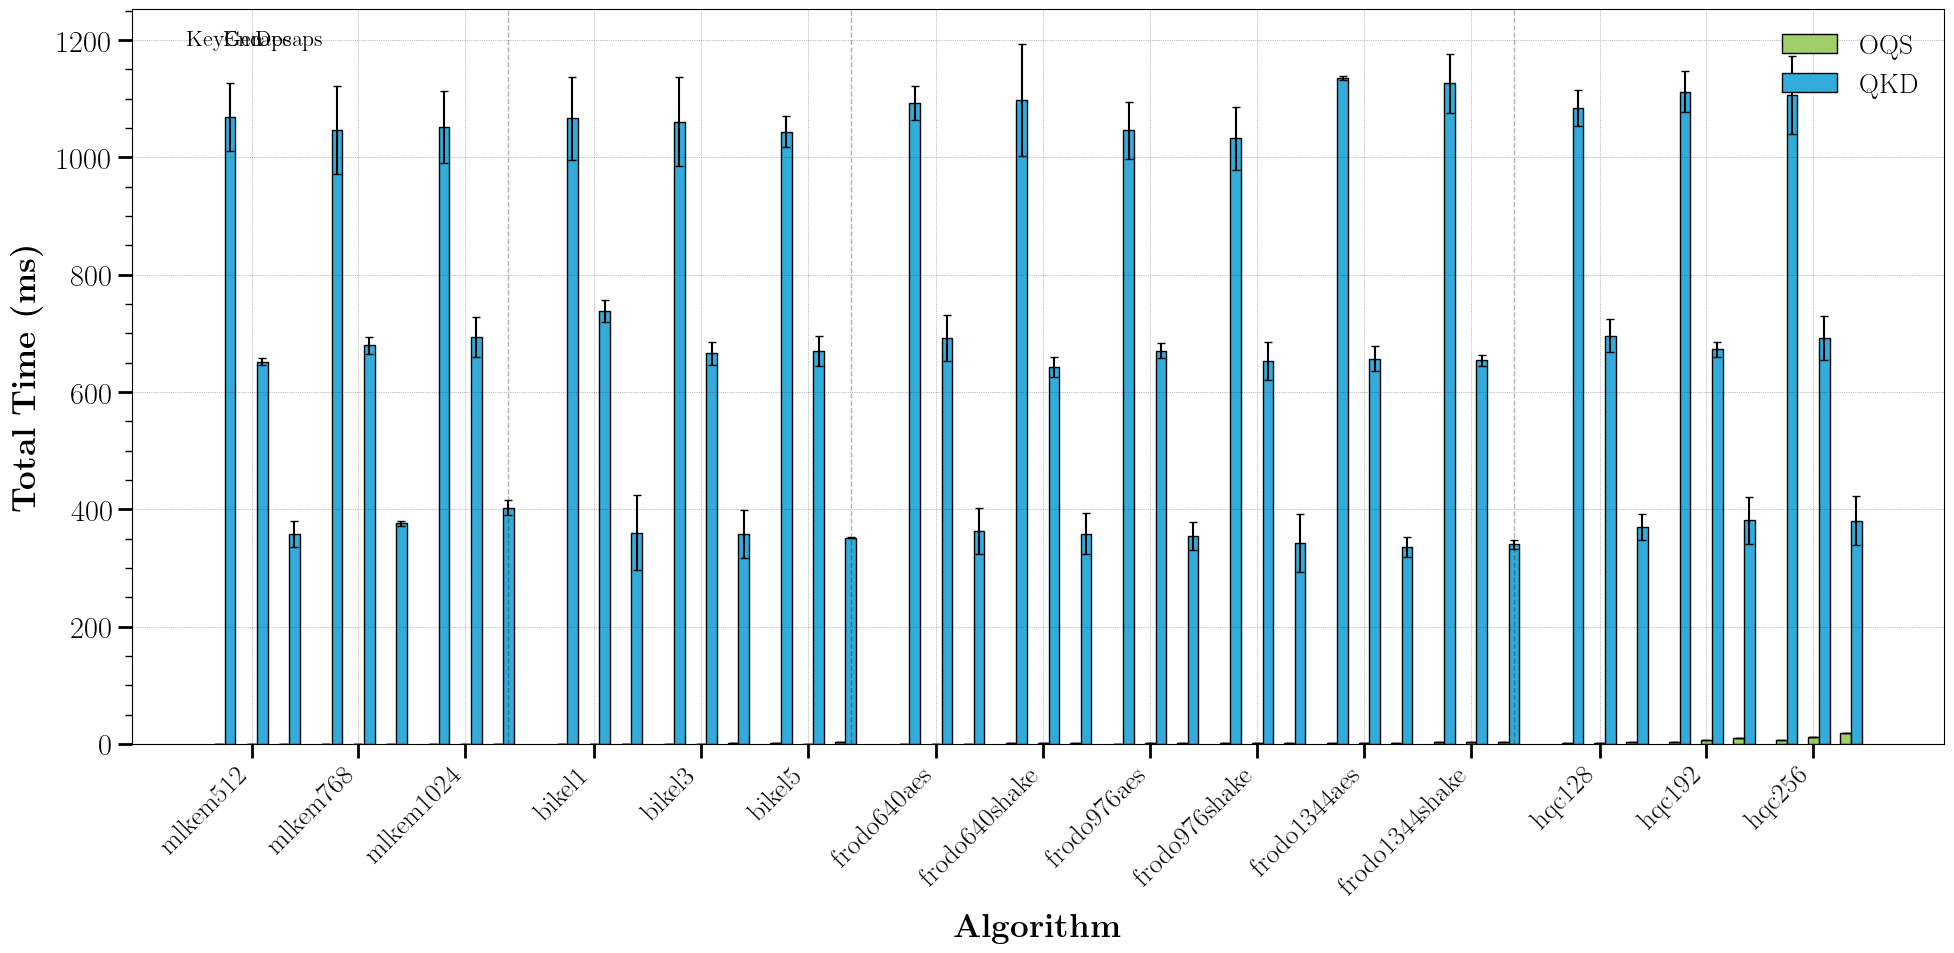

In [31]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='all',plot_title="kems_comparison_all.pdf")

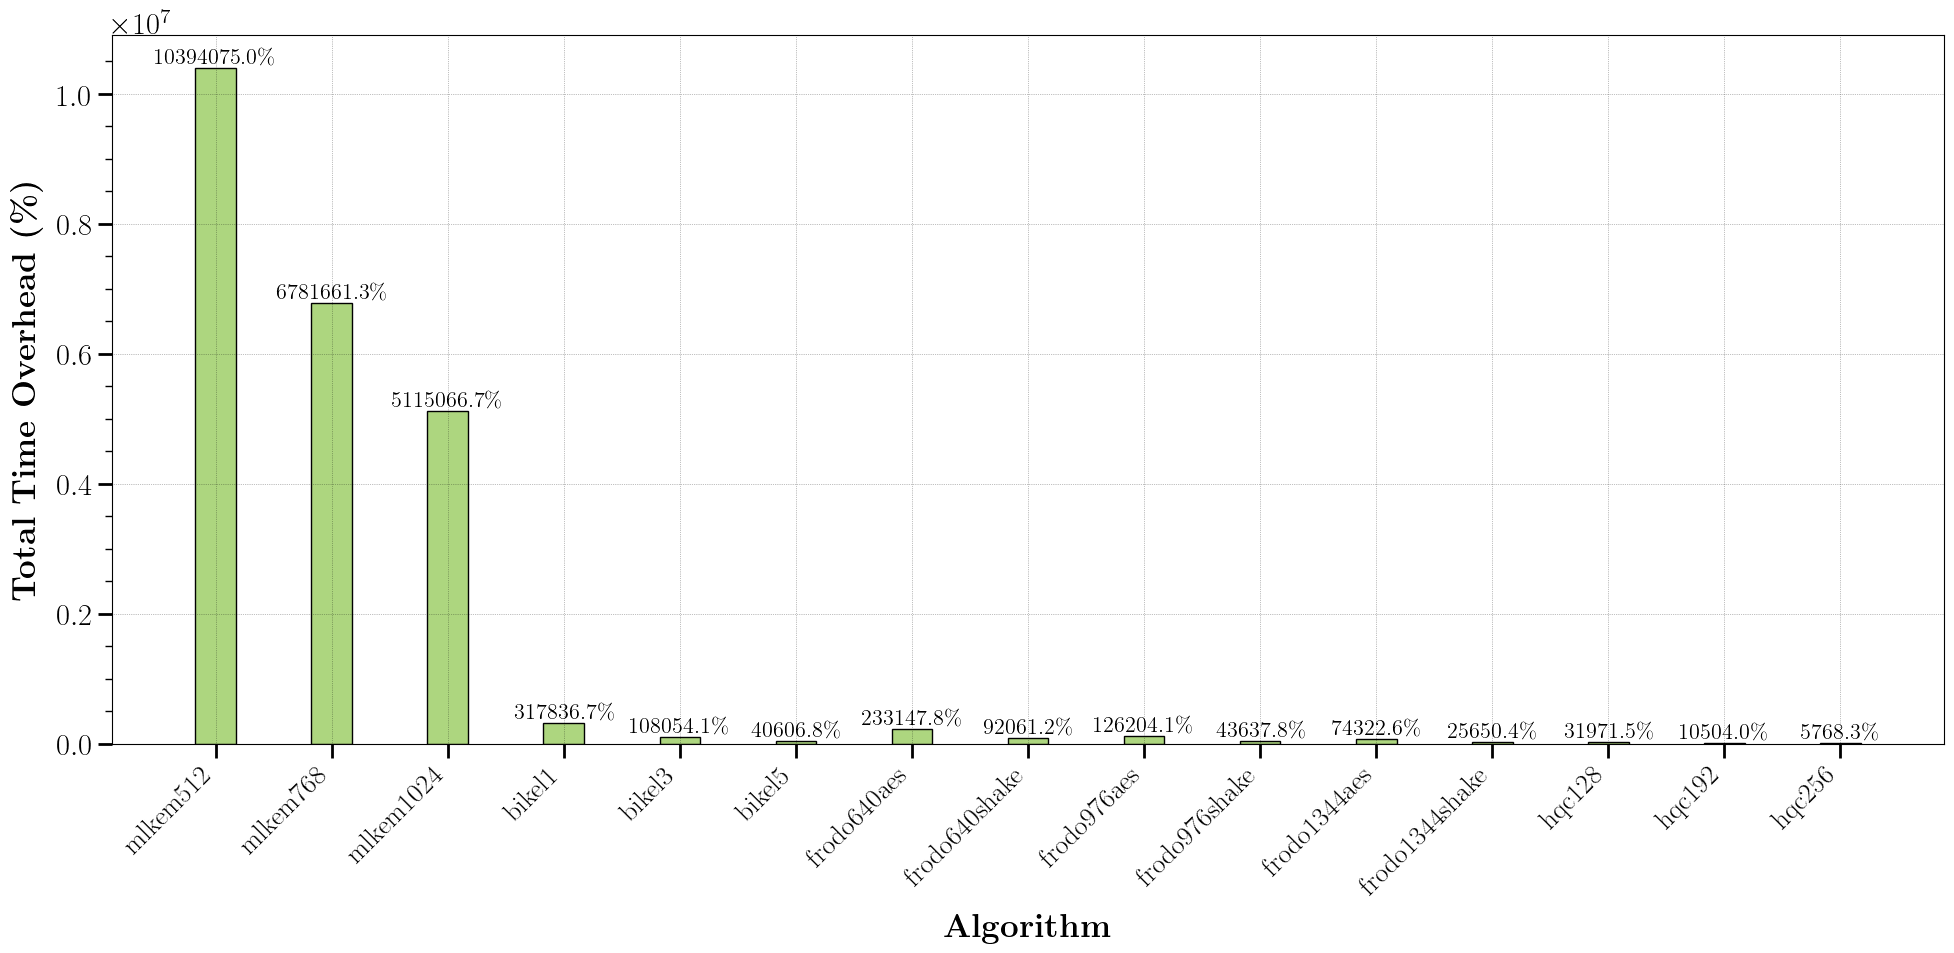

In [32]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='TotalTime(ms)',plot_title="kems_comparison_overhead.pdf")

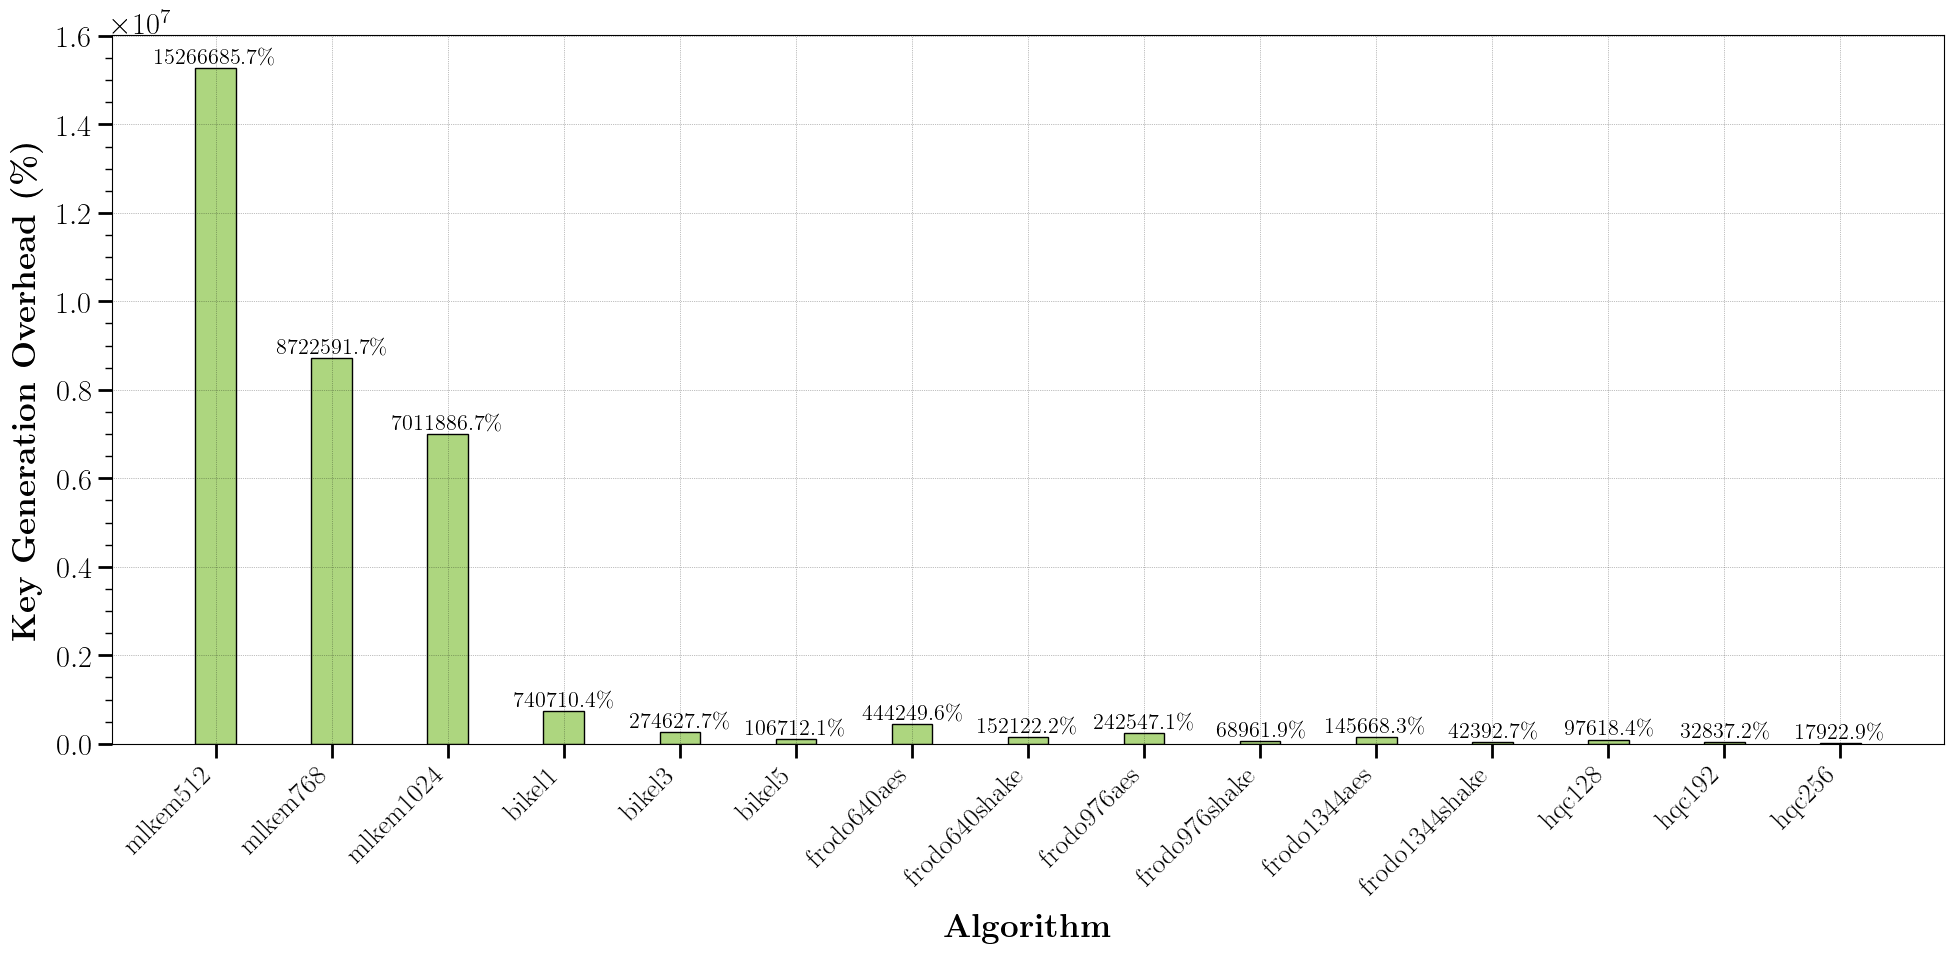

In [33]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='KeyGen(ms)', plot_title="kems_comparison_kg_overhead.pdf")

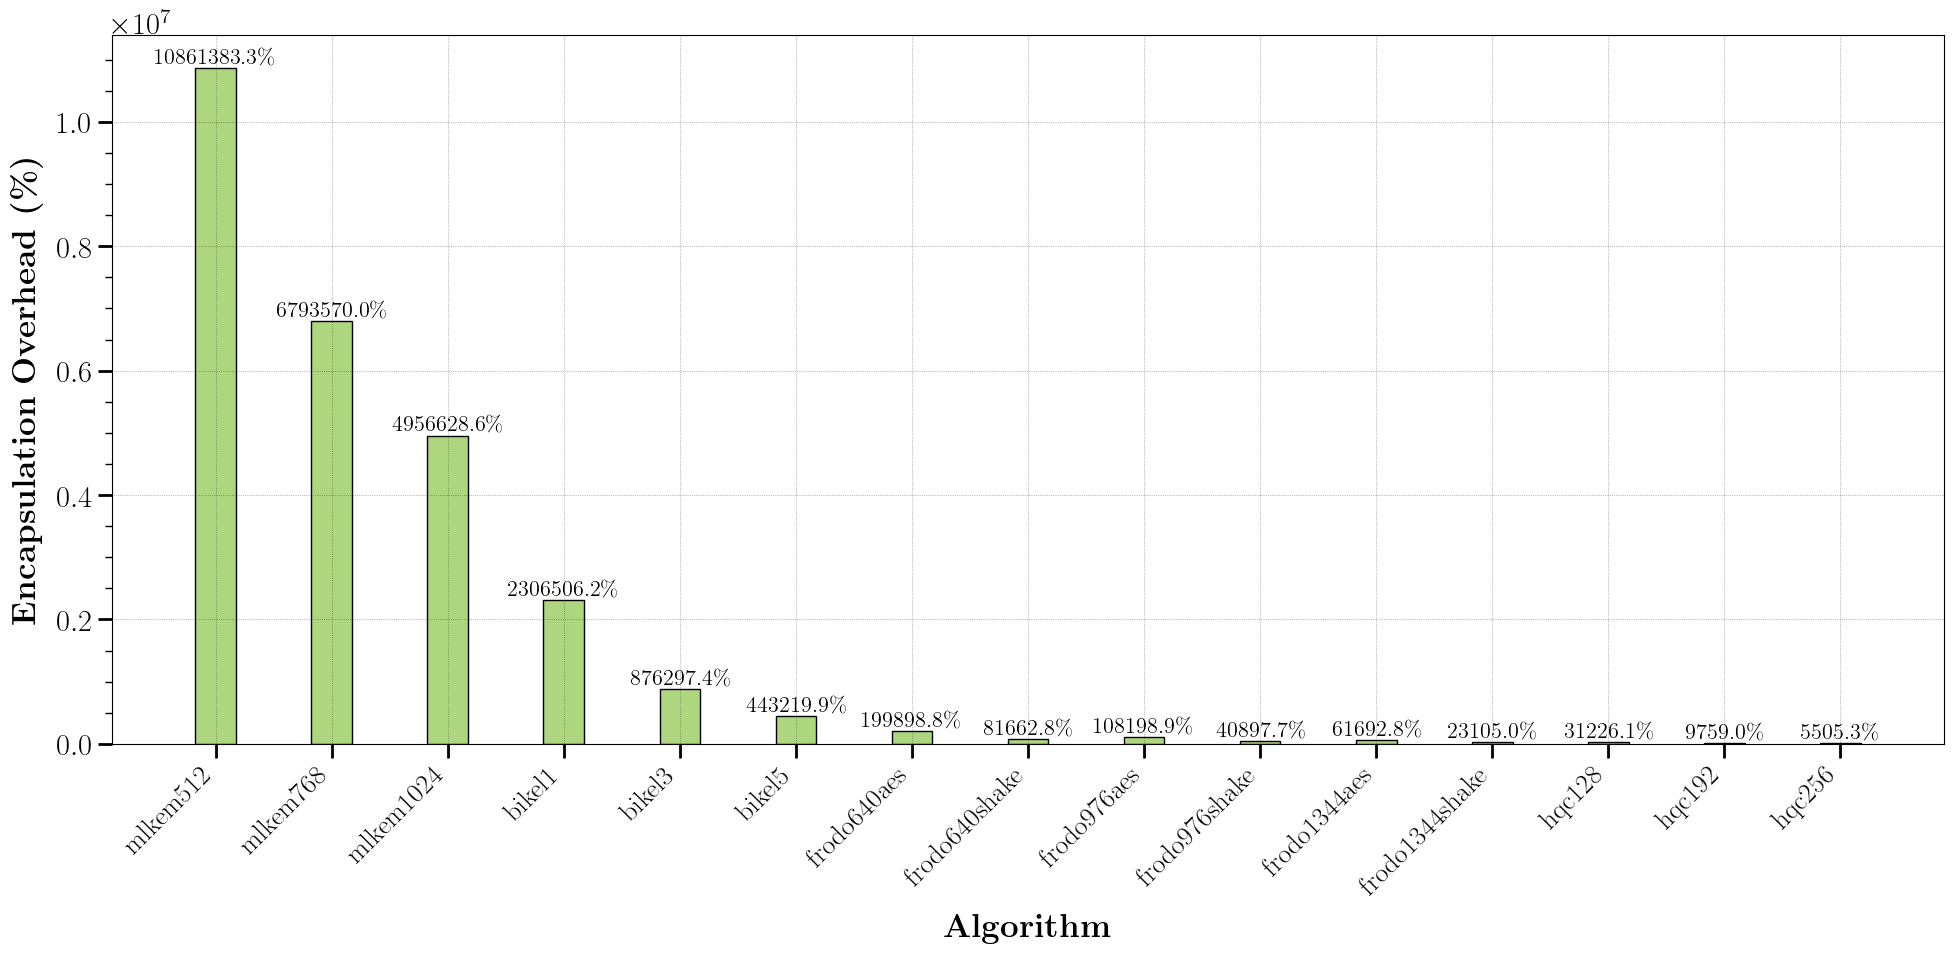

In [34]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Encaps(ms)', plot_title="kems_comparison_encap_overhead.pdf")

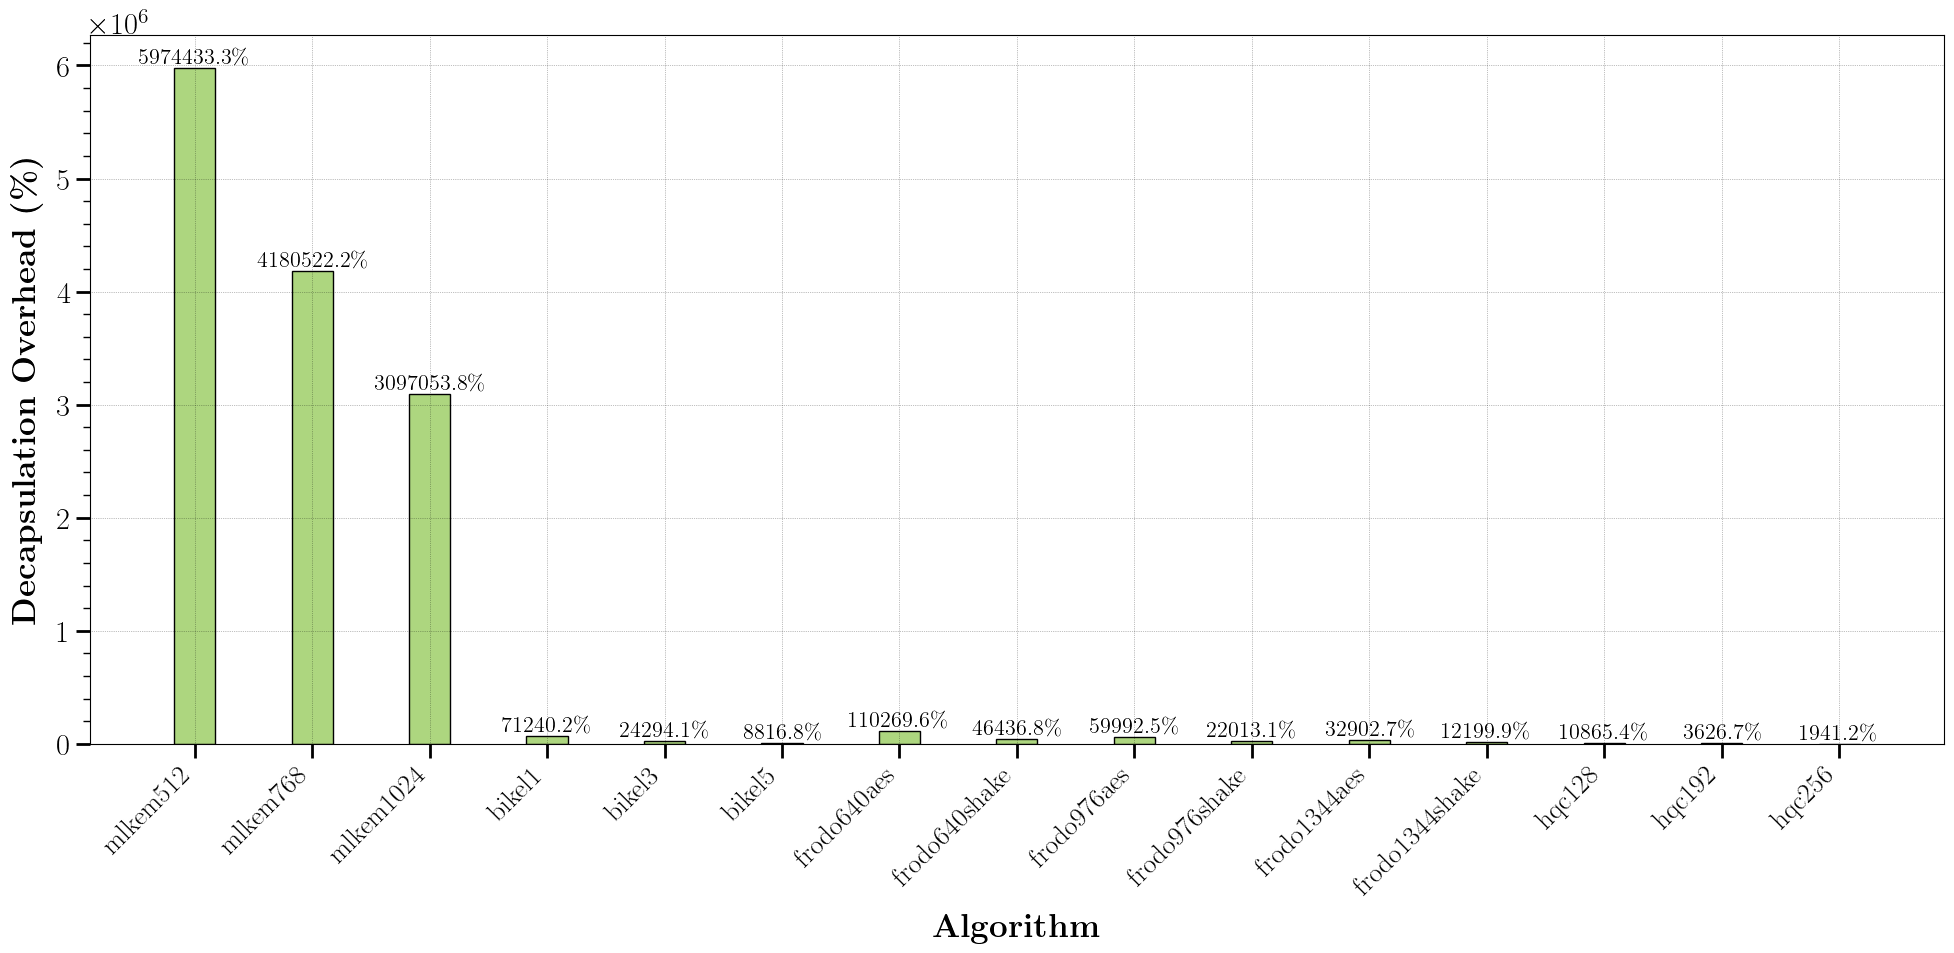

In [35]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Decaps(ms)', plot_title="kems_comparison_decap_overhead.pdf")

# BENCHMARKS - TLS

In [ ]:
df_tls_kems = tls_data_summary("data/tls_bench_oqs_200_iter_20250128.csv")

df_tls_kems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM       Cert                                                           
mlkem1024 falcon1024         200     12.455     4.189      7.15     25.34
          falcon512          200     12.348     4.003      7.46     24.31
          mldsa44            200     11.478     3.495      6.82     23.39
          mldsa65            200     11.664     3.726      6.82     24.76
          mldsa87            200     12.120     3.811      7.27     24.47
...                          ...        ...       ...       ...       ...
hqc256    mldsa65            200     55.155     5.807     46.70     70.33
          mldsa87            200     54.674     5.782     46.46     70.45
          rsa_2048           200     57.953     6.674     46.95     84.61
          rsa_3072           200     57.916     6.779     47.72     77.51
          rsa_4096           200     55.677     6.814     45.92     81.17

[120 rows x 5 columns]

In [ ]:
df_tls_qkdkems = tls_data_summary("data/tls_bench_qkd_200_iter_20250128.csv")

df_tls_qkdkems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM           Cert                                                           
qkd_mlkem1024 falcon1024         200     12.321     3.782      7.27     23.82
              falcon512          200     12.643     3.963      7.31     26.89
              mldsa44            200     11.878     3.671      6.95     23.09
              mldsa65            200     12.323     3.896      6.95     23.52
              mldsa87            200     12.198     3.812      7.38     23.09
...                              ...        ...       ...       ...       ...
qkd_hqc256    mldsa65            200     52.715     4.832     46.63     83.70
              mldsa87            200     55.968     6.662     45.89     74.28
              rsa_2048           200     56.659     6.771     46.83     83.98
              rsa_3072           200     56.684     7.000     47.30     82.55
              rsa_4096           200     56.291     6.974     47.34     96.50

[120 rows x 5 columns]

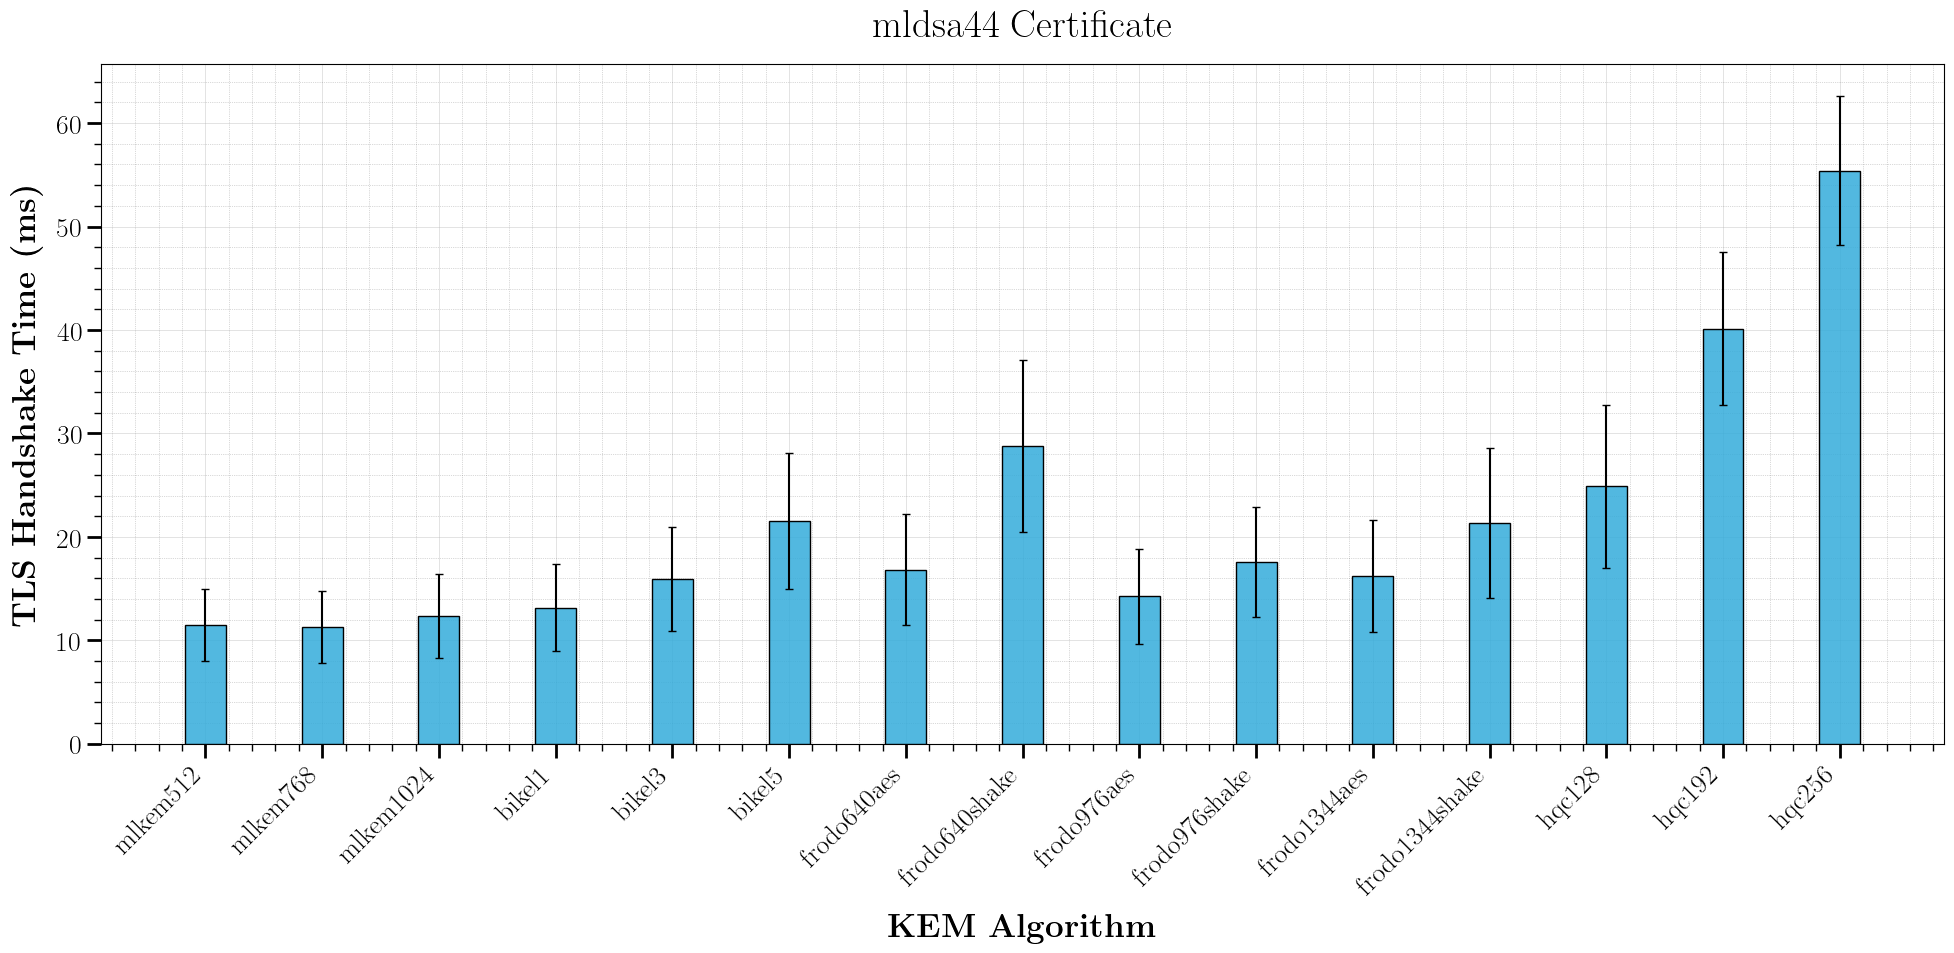

In [38]:
plot_tls_kem_families(input_df=df_tls_kems, cert_type='mldsa44', plot_title="tls_kems_mldsa44.pdf")

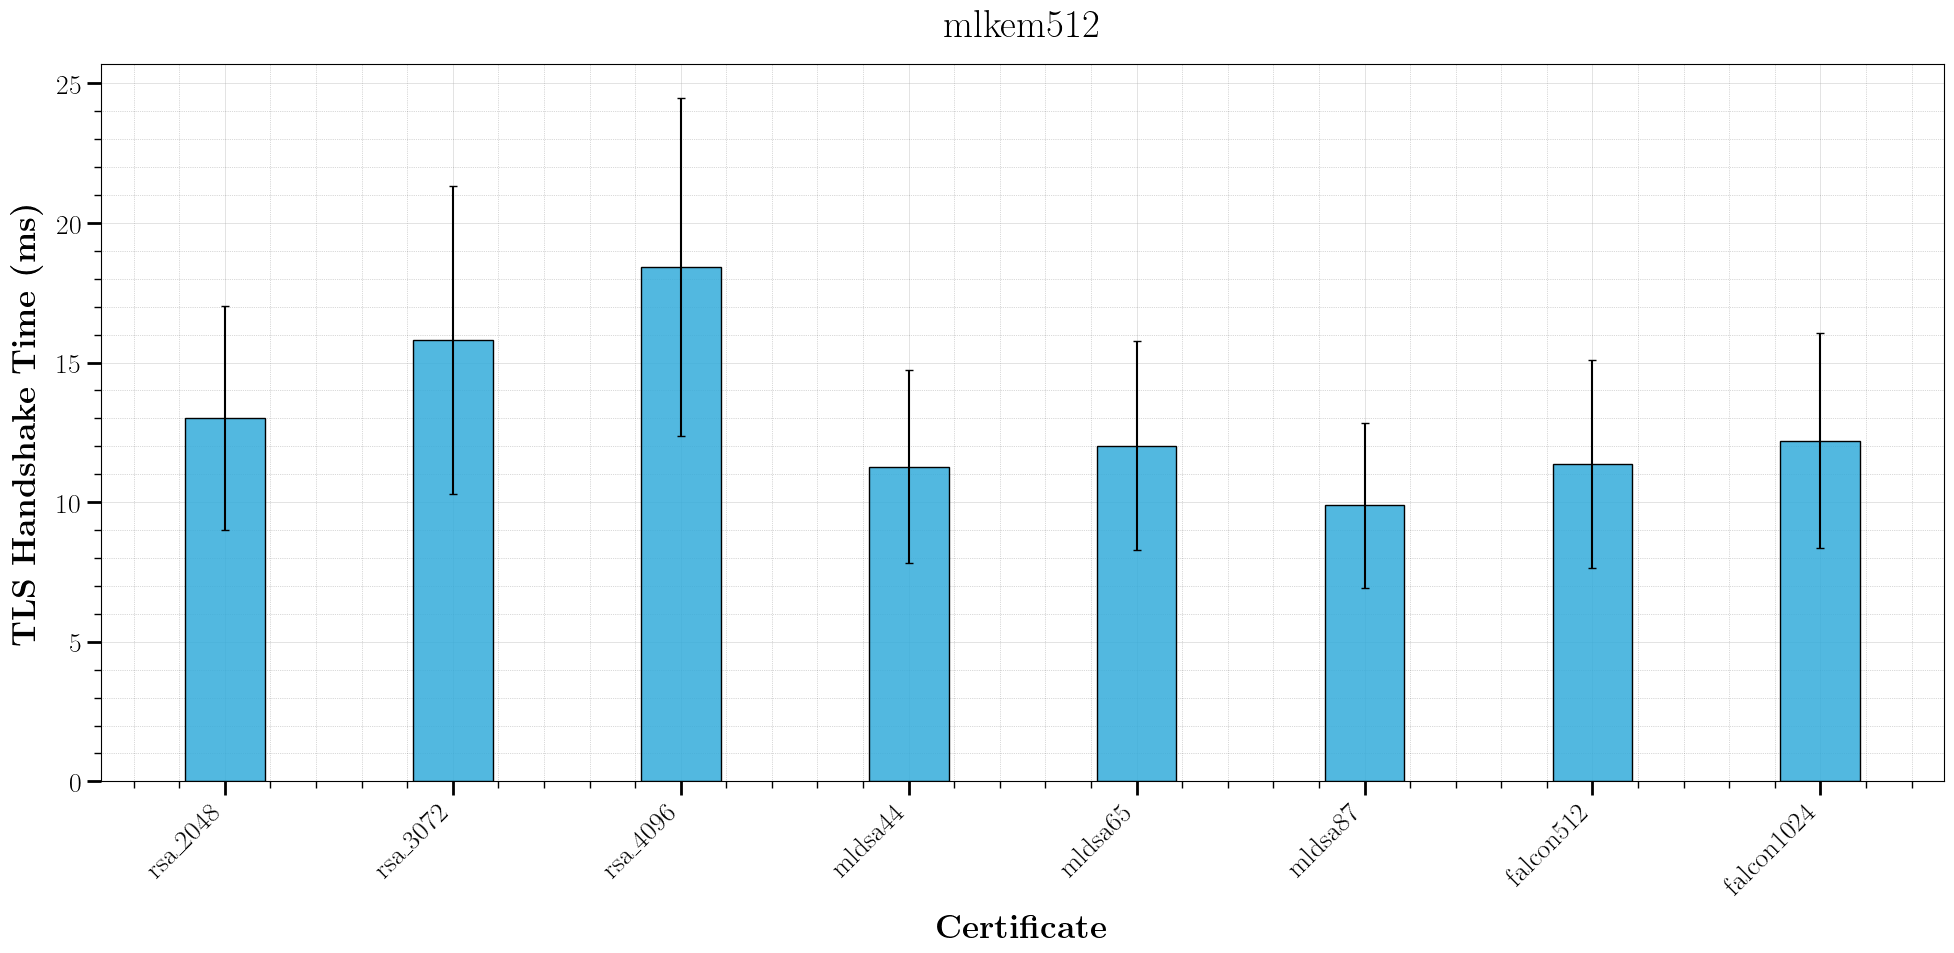

In [39]:
plot_tls_certs_families(input_df=df_tls_kems, kem_type='mlkem512', plot_title="tls_certs_mlkem512.pdf")

In [40]:
merged_df = pd.concat([df_tls_kems, df_tls_qkdkems], keys=['OQS', 'QKD'], names=['Provider'])

merged_df.to_csv("data/tls_comparison_stats.csv")

merged_df

Time_count  Time_mean  Time_std  Time_min  \
Provider KEM        Cert                                                    
OQS      mlkem1024  falcon1024         200     12.455     4.189      7.15   
                    falcon512          200     12.348     4.003      7.46   
                    mldsa44            200     11.478     3.495      6.82   
                    mldsa65            200     11.664     3.726      6.82   
                    mldsa87            200     12.120     3.811      7.27   
...                                    ...        ...       ...       ...   
QKD      qkd_hqc256 mldsa65            200     52.715     4.832     46.63   
                    mldsa87            200     55.968     6.662     45.89   
                    rsa_2048           200     56.659     6.771     46.83   
                    rsa_3072           200     56.684     7.000     47.30   
                    rsa_4096           200     56.291     6.974     47.34   

                                Time_max  
Provider KEM        Cert                  
OQS      mlkem1024  falcon1024     25.34  
                    falcon512      24.31  
                    mldsa44        23.39  
                    mldsa65        24.76  
                    mldsa87        24.47  
...                                  ...  
QKD      qkd_hqc256 mldsa65        83.70  
                    mldsa87        74.28  
                    rsa_2048       83.98  
                    rsa_3072       82.55  
                    rsa_4096       96.50  

[240 rows x 5 columns]

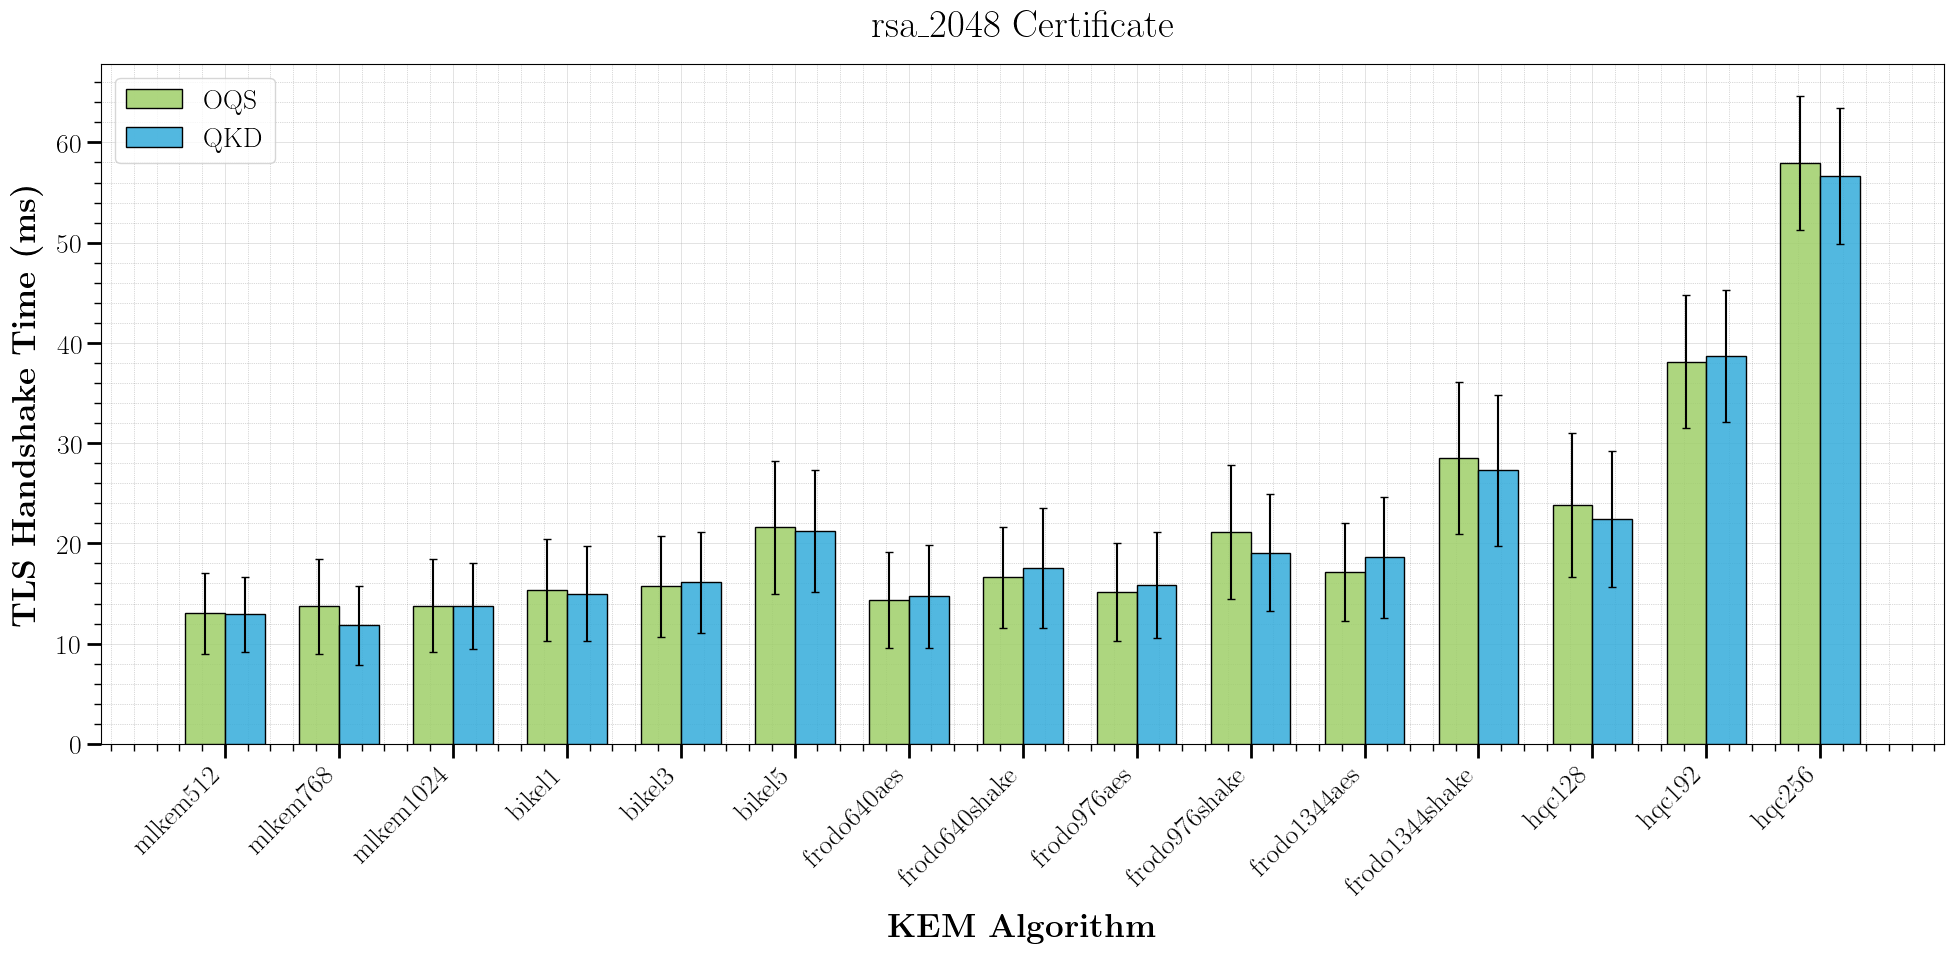

In [41]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', plot_title='tls_kems_comparison_rsa2048.pdf')

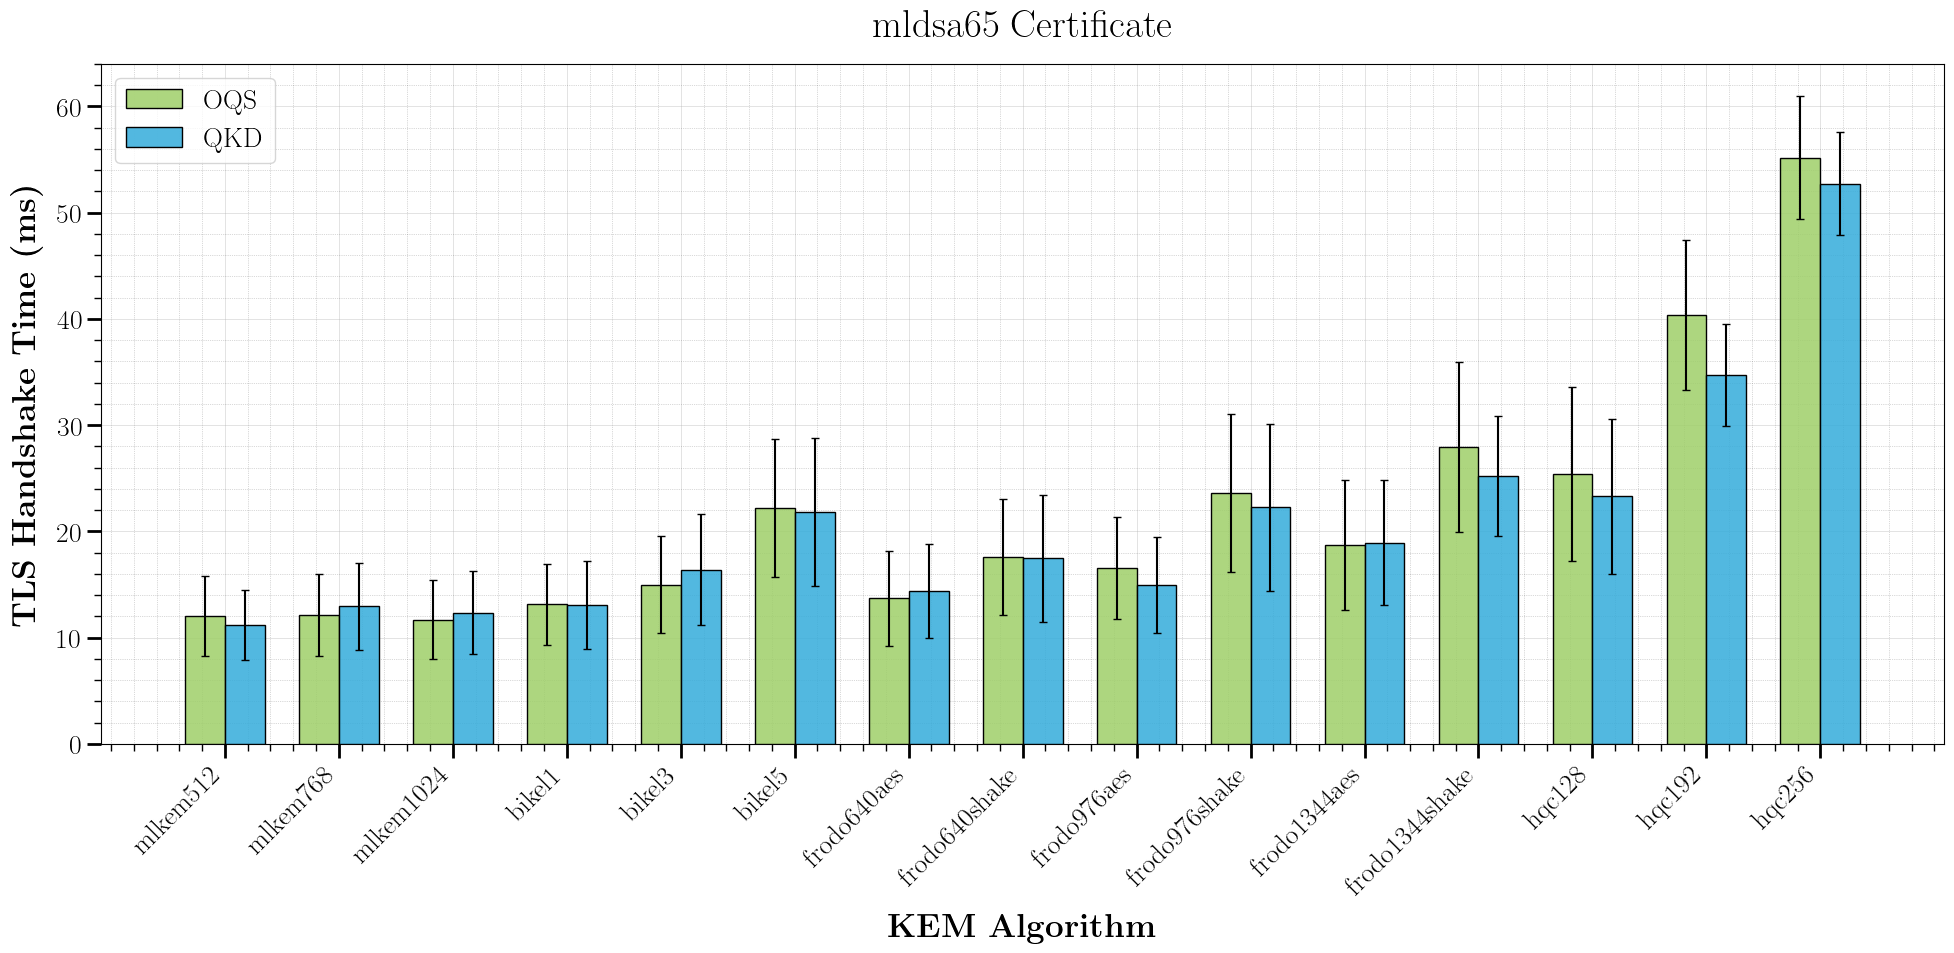

In [42]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', plot_title='tls_kems_comparison_mldsa65.pdf')